## Cars4U

### Objectives

* Explore and Visualize the Dataset (EDA)
* Build a **Linear Regression Model** to Predict the Prices of Used Cars
* Generate Insights and Recommendations for the Company

**(Level of Significance to be Used for Statistical & Hypothesis Testing: 0.05)**

### Data Provided

* S.No. : Vehicle serial number
* Name : Car brand and model name
* Location : Place (city) where car is sold/available for purchase
* Year : Manufacturing year of the car
* Kilometers_driven : Total kilometers (KM) driven by prior owner/s 
* Fuel_Type : Petrol, Diesel, Electric, CNG, LPG
* Transmission : Automatic or Manual
* Owner : First, Second, Third, etc.
* Mileage : The standard fuel economy per litre (kmpl) or per kilogram of weight (km/kg)
* Engine : Engine displacement (CC).
* Power : Maximum power output (BHP).
* Seats : Seats in each car
* New_Price : Price of a new car as comparable to used model for sale in INR Lakhs
    * Assume scale of 1 Lakh = 100, 000
* Price : Price of used car for sale (INR Lakhs) in INR Lakhs
    * Assume scale of 1 Lakh = 100, 000

In [146]:
# Import necessary (initial) Python libraries

import pandas as pd # Library for processing data (series/dataframes)

# To be used later as columns added (One-Hot & Label Encoding, etc.)
pd.set_option('display.max_column', None) # Pandas function to show all columns
pd.set_option('display.max_row', 500) # Pandas function to limit rows to 500 if run wide open (saves space/load time)

import numpy as np # Library for working with arrays and various math requests
import matplotlib.pyplot as plt # Library for basic plot/graph implementation

# Graphs/plots will be included in the workbook and shown following the respective code run
%matplotlib inline 

import seaborn as sns # Library containing expanded plot options for presentation

import warnings # Library for handling Python error messages, etc.
warnings.filterwarnings('ignore') # Ignore any Python warnings about updated library details, etc.

# Statistical libraries to be loaded separately/individually by test

In [147]:
data = pd.read_csv('used_cars_data.csv')
df = data.copy() # Make a backup copy and version for editing the data

In [148]:
df.head(10) # Inspect the top 10 rows of data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [149]:
df.tail(10) # Inspect the bottom 10 rows of data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7243,7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,NaN,NaN
7244,7244,Chevrolet Aveo 1.4 LS,Pune,2009,45463,Petrol,Manual,First,14.49 kmpl,1399 CC,92.7 bhp,5.0,NaN,NaN
7245,7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,NaN
7246,7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,NaN
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,NaN
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [150]:
# Inspect (the same) random 10 rows of data within the dataset

np.random.seed(1) # Numpy function used to make the code repeatable (i.e. random sample won't change after first load)

df.sample(n=10) # Use random sample instead of Head/Tail

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


### Observations

- The Mileage, Engine, Power, and New_Price variables include units after the numerical values
    - These need to be removed in order to perform statistical analysis and model predictions

In [151]:
df.nunique() # Identify count of unique values within each column

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

### Observations

The Dataset contains:
- 11 different locations
- 5 different fuel types
- 2 transmission types
- 4 owner types
- 9 seating options

Additionally, there are 23 unique model years included within the sample

In [152]:
df.shape # Inspect the total shape of the data (rows,columns)

(7253, 14)

In [153]:
df.describe(include='all') # Statistical summary of the dataset, categorical fields included

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,4.78 Lakh,NaN
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,3626.000000,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,2093.905084,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,0.000000,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1813.000000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3626.000000,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,5439.000000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [154]:
df.columns # Check all columns in the dataset

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [155]:
df.info() # Analyze the sample dataset for null/missing data and column datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [156]:
print(df.dtypes[df.dtypes == 'object']) # Print all of the 'object' datatypes
print("")
print('Total Count: {}'.format(df.dtypes[df.dtypes == 'object'].count())) # Print the total count of 'object' datatypes

Name            object
Location        object
Fuel_Type       object
Transmission    object
Owner_Type      object
Mileage         object
Engine          object
Power           object
New_Price       object
dtype: object

Total Count: 9


### Observations

- The sample dataset in not fully intact as there are various columns with missing/null data
    - The **New_Price column is missing a substantial amount of data** and may not be very helpful to us
- There are variety of data types within the sample data, including **9 columns classified as object**
    - Most will be converted to Categories, however further review is required to determine each case

In [157]:
df.isna().sum().sort_values(ascending=False) # Check for and aggregate any missing/NAs in data, by column, sorted high to low

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [158]:
# Calculate % for columns showing largest counts of missing data

print('New Price is missing {}% of the sample data'.format(round(df['New_Price'].isna().sum()/len(df)*100,2)))
print('Price is missing {}% of the sample data'.format(round(df['Price'].isna().sum()/len(df)*100,2)))

New Price is missing 86.13% of the sample data
Price is missing 17.01% of the sample data


### Observations

- The following columns showing as **objects need to be changed to categories**, unless dropped for other reasons:
    - Name, Location, Fuel_Type, Transmission, Owner_Type
    - Seats will stay as Numerical, since the model will require numeric values only for running the regression process
- There are **7253 rows of data and 14 columns**
- There are various columns with missing/null data
    - **New Price is missing over 85% of the data** and may not be a helpful variable
    - **Price** is a crucial variable for this analysis but **is still missing 17% of the data**
    - **Mileage, Engine, Power, and Seats are over 99% intact** and only missing a handful of rows which will be dropped
- S.No. (Serial Number) is not very helpful for this analysis and can be removed
- **Name** could possibly be helpful if broken into different sections, such as **Brand** and maybe **Model**
    - Currently, it is a blended line of detail that requires subgrouping so as to be useful
- Although New Price could be a helpful comparable, there is just too much missing data so it will also be removed

## Pandas Profile Report

Before attempting any data preprocessing, the Pandas Profile Report may offer further insight into areas of focus ahead of EDA

In [159]:
# # Import and run Pandas Profiling - Run a report to gain insight into dataset and necessary preprocessing steps

# from pandas_profiling import ProfileReport

# report = ProfileReport(df) # Run the report for dataframe (df)
# report.to_file(output_file='Report.html') # Save html copy of report - easier to view in separate window

### Report Findings

- Similar issues found with various columns having cardinality (uncommon/no patterns vs. the rest of the dataset)
    - **Serial Number and Name are too unique** for purposes of this analysis and need to be dropped
    - **New Price will be dropped due to missing over 86% of the data**, with the remaining data appearing disconnected from the sample
    - **Mileage, Engine, and Power initially appear unique within the dataset due to the units that follow**
        - Each will need the unit removed and possible require mathematical conversion to maintain uniformity within the column
        - **Since 1L = 1 KG, the Mileage units are equivalent** and no further calculation is required
    - **Kilometers Driven is right skewed** and has large outliers on both the Min and Max sides of the data
        - Adjustments will need to be made in order to use this variable in the analysis/modeling
    - **Price**, the target/label variable, is missing 17% of the data and will need to be addressed somehow

### Addressing the Main Outliers in Kilometers_Driven

Referring back to the Pandas report, top 5 Min/Max values (Outliers) all have a count of only 1 and can likely be removed ahead of any further data preprocessing.  They are as follows:
- Min (Meters)
    - 171m
    - 600m
    - 1000m
    - 1001m
    - 1011m
- Max (Kilometers)
    - 6.5MM
    - 775kM
    - 720kM
    - 620KM
    - 480KM
    

It may be easier to look at **Kilometers_Driven respective to the price of the car**, to get a better sense of **proportionality**.

Kilometers_Driven may very likely be dropped later on, with KM/Price taking its place.

In [160]:
# Create new data column called KM/Price which is simply the average KMs per 1 Lakh or price

df['KM/Price']=df['Kilometers_Driven']/df['Price']
df['KM/Price'].sort_values(ascending=False) # Sort in Descending order to see the top 5 highest prices items

3649    300000.000000
2737    285714.285714
647     250000.000000
230     235294.117647
5273    235294.117647
            ...      
7248              NaN
7249              NaN
7250              NaN
7251              NaN
7252              NaN
Name: KM/Price, Length: 7253, dtype: float64

We can see null values above, which aligns to the nulls in the Price column which is now the respective denominator.

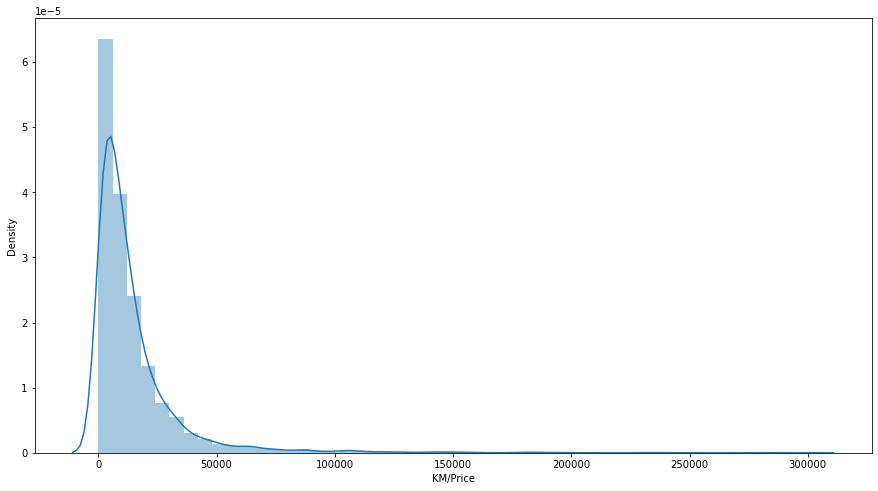

In [161]:
# Quickly inspect the general distribution of the KM/Price variable

plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
ax=sns.distplot(df['KM/Price'])

It is very apparent just how right skewed the Kilometers_Driven (numerator) variable is.  Adjustments will need to be made in order to normalize this distribution and allow for accurate predictive modelling.

**The Kilometers_Driven metric offers little in additional value vs. the KM/Price ratio created, it can therefore be dropped**.

In [162]:
df=df.drop('Kilometers_Driven',axis=1) # Drop the Name column now that Brand and Model have been extracted

### Addressing the Main Data Alignment in the Years Column

In [163]:
df['Year'].describe() # Summarize the main statictics behind the Years variable

count    7253.000000
mean     2013.365366
std         3.254421
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [164]:
df['Year'].value_counts() # Show the total count of values in the dataset by Year

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

In [165]:
df.groupby('Year')['Price'].mean() # Show the mean price, by year, in the dataset

Year
1996          NaN
1998     1.432500
1999     0.835000
2000     1.175000
2001     1.543750
2002     1.294000
2003     2.440000
2004     1.941290
2005     2.026842
2006     3.355897
2007     3.204000
2008     3.917759
2009     5.177727
2010     5.515497
2011     6.831931
2012     7.324724
2013     8.699353
2014     9.639360
2015    11.215538
2016    11.719096
2017    13.764940
2018    15.726141
2019    19.464118
Name: Price, dtype: float64

Over **75% of the dataset lies between 2011 (1st Quantile) and 2019 (Max value)**.  The Older aged cars are not only smaller in sample count but also lower in average pricing and performance.  

They can most likely be dropped so as to determine a more accurate model for 'more likely' car pricing, since much older vehicle models are becoming less common on the used car market as time progresses.

In [166]:
df.drop(df[df['Year']<=2011].index, axis=0, inplace=True)

In [167]:
df['Location'].value_counts() # Show the total count of values in the dataset by Location

Kochi         717
Coimbatore    711
Mumbai        688
Hyderabad     597
Delhi         518
Pune          485
Kolkata       482
Chennai       347
Jaipur        330
Bangalore     323
Ahmedabad     212
Name: Location, dtype: int64

In [168]:
df.groupby('Location')['Price'].mean() # Show the mean price, by Location, in the dataset

Location
Ahmedabad      9.391207
Bangalore     15.523864
Chennai       10.125245
Coimbatore    15.580681
Delhi         10.640161
Hyderabad     11.519250
Jaipur         7.388278
Kochi         11.578567
Kolkata        6.344552
Mumbai        10.762491
Pune           8.503384
Name: Price, dtype: float64

There are no obvious outliers within the dataset, rather some interesting details regaring average prices by city.
- Bangalore and Coimbatore are pricier cities to purchase from, with mean prices around 15.2 to 15.6 Lakhs
- Kolkata and Jaipur appear to be the cheaper locations to purchase a vehicle from, with mean prices around 6.3 to 7.4 Lakhs

### Extract Brand and Model from Name Column: Remove Original Column

In [169]:
# For loop to pull the first word of each string and line in the Name column and append it to temp column Brand
Brand=[]
for i in df['Name']:
    temp=i.split()[0]
    Brand.append(temp)

df['Brand']=Brand # Assign temp column Brand to new Dataframe column Brand
df['Brand']=pd.DataFrame(df[['Brand']])

# For loop to pull the second word of each string and line in the Name column and append it to temp column Model
Model=[]
for i in df['Name']:
    temp2=i.split()[1]
    Model.append(temp2)

df['Model']=Model # Assign temp column Model to new Dataframe column Model
df['Model']=pd.DataFrame(df[['Model']])

df=df.drop('Name',axis=1) # Drop the Name column now that Brand and Model have been extracted

del temp, temp2, Brand, Model # Delete all temporary tables which won't be further needed

In [170]:
df.nunique() # Look at the number of unique entries per column - focusing on larger counts on the newly added subgroups

S.No.           5410
Location          11
Year               8
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          400
Engine           116
Power            328
Seats              9
New_Price        597
Price           1254
KM/Price        4066
Brand             27
Model            184
dtype: int64

In [171]:
# Count Brand occurrences to determine which brands to drop (low value counts) to remove
print('Total Count: {}'.format(df['Brand'].value_counts().sum()))

df['Brand'].value_counts()

Total Count: 5410


Maruti           1087
Hyundai          1004
Honda             527
Toyota            355
Volkswagen        292
Mercedes-Benz     278
Mahindra          272
Ford              244
Audi              240
BMW               217
Tata              169
Renault           168
Skoda             129
Nissan             93
Chevrolet          83
Land               57
Jaguar             44
Mini               31
Mitsubishi         23
Volvo              22
Jeep               19
Datsun             17
Fiat               17
Porsche            14
Force               3
ISUZU               3
Isuzu               2
Name: Brand, dtype: int64

- **Isuzu has two spellings** due to upper cases and should be changed to just one with lower case
- **Land** can be changed to **Land Rover** as it is more commonly known

In [172]:
# Change ISUZU to lower case version
df['Brand'].replace(to_replace='ISUZU',\
                         value='Isuzu', inplace=True)

# Change Land to full name Land Rover
df['Brand'].replace(to_replace='Land',\
                         value='Land Rover', inplace=True)

In [173]:
print('Total Count: {}'.format(df['Model'].value_counts().sum())) # Print total count of Models

df['Model'].value_counts() # Look at the count of models (extracted from Name column)

Total Count: 5410


Swift         337
i20           235
City          199
Grand         180
Verna         156
Polo          146
Innova        145
Amaze         127
XUV500        126
Alto          119
Creta         118
Wagon         111
Duster         97
Vento          95
Fortuner       88
Ertiga         86
i10            85
Ciaz           83
Brio           78
EON            77
New            77
Figo           76
A4             71
3              70
Baleno         69
Etios          69
E-Class        69
Xcent          68
Ecosport       67
Celerio        66
Jazz           62
5              59
Rapid          58
Rover          57
Vitara         55
A6             54
Ritz           51
EcoSport       50
KWID           44
Corolla        40
Scorpio        37
Beat           35
Q3             35
Superb         34
Indica         33
Q7             33
X1             33
XF             33
Q5             32
Terrano        30
Sunny          30
Elantra        29
Micra          29
Cooper         28
Endeavour      28
Nano      

In [174]:
print('Total Count: {}'.format(df['Brand'].value_counts().sum())) # Print total count of Brands

# Examine Value Counts summary to make sure changes occurred as planned
df['Brand'].value_counts()

Total Count: 5410


Maruti           1087
Hyundai          1004
Honda             527
Toyota            355
Volkswagen        292
Mercedes-Benz     278
Mahindra          272
Ford              244
Audi              240
BMW               217
Tata              169
Renault           168
Skoda             129
Nissan             93
Chevrolet          83
Land Rover         57
Jaguar             44
Mini               31
Mitsubishi         23
Volvo              22
Jeep               19
Datsun             17
Fiat               17
Porsche            14
Isuzu               5
Force               3
Name: Brand, dtype: int64

- The Car Models dataset is too large, therefore the focus will be on Brands only and this column will likely be dropped
- **Some Brands have counts as low as 3 or less and will require further analysis before dropping**

**Inspect the Mean of the Brands column** to help better determine what, if any, brands should be dropped from the dataset.

In [175]:
print('Brand Mean: {}'.format(round(df['Price'].mean(),2))) # Print overall Price mean to compare against Brand means

# Sort through all Brand Names and calculate the mean cost (look for highest values)

df.groupby("Brand")["Price"].mean() # Group the Brands alphabetically and include the mean price

Brand Mean: 10.97


Brand
Audi             28.073503
BMW              29.826467
Chevrolet         3.745714
Datsun            3.049231
Fiat              4.992500
Force             9.333333
Ford              8.703876
Honda             6.216843
Hyundai           6.265574
Isuzu            14.696667
Jaguar           38.233243
Jeep             18.718667
Land Rover       41.209412
Mahindra          8.923378
Maruti            5.294940
Mercedes-Benz    31.926696
Mini             26.896923
Mitsubishi       15.574667
Nissan            5.048082
Porsche          53.681538
Renault           5.790979
Skoda             9.593178
Tata              4.265294
Toyota           13.757379
Volkswagen        5.702834
Volvo            20.636471
Name: Price, dtype: float64

In [176]:
df.groupby("Brand")["Price"].min() # Group the Brands alphabetically and include the minimum price

Brand
Audi             10.20
BMW               6.67
Chevrolet         1.40
Datsun            2.25
Fiat              2.50
Force             8.00
Ford              2.10
Honda             2.30
Hyundai           1.60
Isuzu             8.00
Jaguar           16.58
Jeep             15.00
Land Rover       14.00
Mahindra          2.90
Maruti            1.50
Mercedes-Benz    11.00
Mini             17.00
Mitsubishi        9.15
Nissan            1.75
Porsche           2.02
Renault           2.40
Skoda             2.19
Tata              0.53
Toyota            2.44
Volkswagen        2.59
Volvo            12.00
Name: Price, dtype: float64

In [177]:
df.groupby("Brand")["Price"].max() # Group the Brands alphabetically and include the maximum price

Brand
Audi              72.94
BMW               93.67
Chevrolet          9.87
Datsun             3.95
Fiat               7.71
Force             12.00
Ford              56.80
Honda             17.50
Hyundai           23.00
Isuzu             20.00
Jaguar           100.00
Jeep              23.91
Land Rover       160.00
Mahindra          17.63
Maruti            11.50
Mercedes-Benz     90.00
Mini              39.75
Mitsubishi        28.00
Nissan             8.92
Porsche           75.00
Renault           14.01
Skoda             27.30
Tata              17.85
Toyota            35.82
Volkswagen        24.90
Volvo             32.50
Name: Price, dtype: float64

- There our some extrem outliers vs the overall mean of 9.5 Lakhs, including:
- Various outliers skewing the data right (Mean higher than Median), including:
    - Porsche - mean of 53.7 Lakhs
    - Land (Rover) - mean of 41.2 Lakhs
    - Jaguar - mean of 38.2 Lakhs
        
**We cannot simply drop them just for being outliers as these are real transactions that may/may not effect pricing predictions.**

In [178]:
# Examine the Porsche brand with very High Mean
df[df['Brand']=='Porsche']

,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,KM/Price,Brand,Model
1078,1078,Kolkata,2015,Petrol,Automatic,First,8.6 kmpl,2706 CC,265 bhp,2.0,NaN,64.00,164.250000,Porsche,Boxster
1755,1755,Mumbai,2013,Diesel,Automatic,First,15.15 kmpl,2967 CC,240 bhp,5.0,NaN,40.00,1750.000000,Porsche,Cayenne
2659,2659,Kolkata,2015,Diesel,Automatic,First,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,75.00,334.666667,Porsche,Panamera
2706,2706,Kochi,2014,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,NaN,51.52,1165.236801,Porsche,Panamera
2896,2896,Delhi,2013,Diesel,Automatic,Second,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,50.50,950.495050,Porsche,Panamera
3132,3132,Kochi,2019,Petrol,Automatic,First,13.33 kmpl,2995 CC,340 bhp,5.0,1.36 Cr,2.02,7078.217822,Porsche,Cayenne
3489,3489,Bangalore,2013,Diesel,Automatic,Second,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,75.00,264.373333,Porsche,Panamera
4185,4185,Kochi,2015,Diesel,Automatic,First,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,60.95,902.313372,Porsche,Panamera
4377,4377,Coimbatore,2015,Diesel,Automatic,First,16.12 kmpl,2967 CC,245 bhp,5.0,NaN,45.82,1318.092536,Porsche,Cayenne
5341,5341,Coimbatore,2016,Diesel,Automatic,First,13.6 kmpl,4134 CC,382 bhp,5.0,NaN,67.83,958.322276,Porsche,Cayenne


In [179]:
# Examine the Jaguar brand with very High Mean
df[df['Brand']=='Jaguar']

,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,KM/Price,Brand,Model
355,355,Hyderabad,2017,Diesel,Automatic,First,19.33 kmpl,1999 CC,177 bhp,5.0,72.64 Lakh,52.00,403.846154,Jaguar,XF
389,389,Mumbai,2017,Petrol,Automatic,First,13.5 kmpl,1999 CC,246.74 bhp,5.0,53.72 Lakh,34.50,260.869565,Jaguar,XE
407,407,Bangalore,2013,Diesel,Automatic,First,14.74 kmpl,2993 CC,270.9 bhp,5.0,NaN,27.95,2683.363148,Jaguar,XF
566,566,Kochi,2015,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,29.98,1245.496998,Jaguar,XF
598,598,Delhi,2016,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,227.272727,Jaguar,XF
655,655,Mumbai,2017,Petrol,Automatic,First,9.43 kmpl,1999 CC,237.4 bhp,5.0,NaN,75.00,140.013333,Jaguar,XJ
751,751,Coimbatore,2016,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,35.68,1341.844170,Jaguar,XF
864,864,Coimbatore,2015,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,32.80,1347.378049,Jaguar,XF
939,939,Kolkata,2012,Diesel,Automatic,First,14.74 kmpl,2993 CC,270.9 bhp,5.0,NaN,20.50,2122.439024,Jaguar,XF
1037,1037,Delhi,2014,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,NaN,26.50,1811.320755,Jaguar,XF


In [180]:
# Examine the Land Rover brand with very High Mean
df[df['Brand']=='Land Rover']

,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,KM/Price,Brand,Model
13,13,Delhi,2014,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,2666.666667,Land Rover,Rover
14,14,Pune,2012,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,4857.142857,Land Rover,Rover
191,191,Coimbatore,2018,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,647.256098,Land Rover,Rover
311,311,Delhi,2017,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,1000.000000,Land Rover,Rover
399,399,Hyderabad,2012,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.00,1866.666667,Land Rover,Rover
404,404,Coimbatore,2017,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,53.83,650.009289,Land Rover,Rover
410,410,Coimbatore,2014,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,29.67,3223.761375,Land Rover,Rover
480,480,Delhi,2015,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,NaN,33.50,716.417910,Land Rover,Rover
521,521,Coimbatore,2017,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,45.64,1079.645048,Land Rover,Rover
941,941,Kochi,2018,Diesel,Automatic,First,15.68 kmpl,1999 CC,177 bhp,5.0,75.12 Lakh,59.72,526.239116,Land Rover,Rover


- The **Porsche, Jaguar, and Land Rover** variables do offer much insight and value within the dataset and arguably are **correctly included in the pricing analysis**


The Individual Brands can be further categorized into 4 Subgroupings as follows:
- **Economy** (Up to 10 Lakhs)
- **Middle** (10 to 20 Lakhs)
- **Premium** (20 to 35 Lakhs)
- **Super Premium** (35 Lakhs and Higher)

In [181]:
# Create a temporary table to recategorize the Brands based on Mean Price, sorted in Descending order

AvgBrandPrice=df.groupby("Brand")["Price"].mean() 
AvgBrandPrice.sort_values(ascending=False)

Brand
Porsche          53.681538
Land Rover       41.209412
Jaguar           38.233243
Mercedes-Benz    31.926696
BMW              29.826467
Audi             28.073503
Mini             26.896923
Volvo            20.636471
Jeep             18.718667
Mitsubishi       15.574667
Isuzu            14.696667
Toyota           13.757379
Skoda             9.593178
Force             9.333333
Mahindra          8.923378
Ford              8.703876
Hyundai           6.265574
Honda             6.216843
Renault           5.790979
Volkswagen        5.702834
Maruti            5.294940
Nissan            5.048082
Fiat              4.992500
Tata              4.265294
Chevrolet         3.745714
Datsun            3.049231
Name: Price, dtype: float64

In [182]:
Economy = ['Skoda','Force','Mahindra','Ford','Hyundai','Honda','Renault','Volkswagen','Maruti','Nissan','Fiat','Tata','Chevrolet','Datsun']
Middle = ['Toyota','Isuzu','Jeep','Mitsubishi']
Premium = ['Volvo','Mini','Audi','BMW','Mercedes-Benz']
Super_Premium = ['Porsche','Land Rover','Jaguar']

In [183]:
# Run separate for loops for each brand subclass, changing the respective brand name to one of the 4 criteria above

for i in Economy:
    df['Brand'].replace(to_replace=i,\
                         value='Economy', inplace=True)
    
for j in Middle:
    df['Brand'].replace(to_replace=j,\
                         value='Middle', inplace=True)
    
for k in Premium:
    df['Brand'].replace(to_replace=k,\
                         value='Premium', inplace=True)

for l in Super_Premium:
    df['Brand'].replace(to_replace=l,\
                         value='Super_Premium', inplace=True)    

In [184]:
print('Total Count: {}'.format(df['Brand'].value_counts().sum()))

df['Brand'].value_counts() # Inspect the split of Brands vs the total count

Total Count: 5410


Economy          4105
Premium           788
Middle            402
Super_Premium     115
Name: Brand, dtype: int64

### Variables Not Needed: To be Completely Dropped (Column)

There are a few variables that I would argue provide little to no value in the analysis and regression modeling, namely:
- **Model:** This variable can certainly offer some additional accuracy in training the model, however at the cost of **significantly deprecating the testing outcomes due to overfitting** it with over an additional 200 lines (or columns when encoded)
- **S.No:** The serial number is unique to each vehicle in the dataset an offers absolutely 0 benefit for our analysis/modeling
- **New_Price:** Not only is this variable missing over 85% of the sample dataset which causes accuracy issues, but it is not the best indicator of actual used price valuations
    - **The combination of other variables, such as brand, manufactured year, mileage, and engine stats, can determine a valuation regardless of the initial price paid/provided**

In [185]:
# Drop the above-mentioned columns from the sample dataset using a for loop

cols_to_drop = ['Model','S.No.','New_Price']
for i in cols_to_drop:
    df=df.drop(i, axis=1)  

In [186]:
# Convert certain columns from object to numerical by removing strings following the numbers

# Use the String Strip() function to remove specific text from each variable/column

df['Power']=df['Power'].str.strip(' bhp')
df['Engine']=df['Engine'].str.strip(' CC')
df['Mileage']=df['Mileage'].str.strip(' km/kg')
df['Mileage']=df['Mileage'].str.strip(' kmpl')

Regarding the different Mileage units (km/kg and kmpl), since the respective fuel types are still included witin the sample dataset, **no conversion is required due to proportionality across these different variables**.

In [187]:
# Now convert the three adjusted columns to numerical, adjusting for errors or NaNs if applicable

df['Power']=pd.to_numeric(df['Power'],errors='coerce') 
df['Engine']=pd.to_numeric(df['Engine'],errors='coerce')
df['Mileage']=pd.to_numeric(df['Mileage'],errors='coerce')

In [188]:
df.info() # Rerun the informational summary to ensure numeric dtype changes are correct (Categorical to be done later)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5410 entries, 1 to 7252
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      5410 non-null   object 
 1   Year          5410 non-null   int64  
 2   Fuel_Type     5410 non-null   object 
 3   Transmission  5410 non-null   object 
 4   Owner_Type    5410 non-null   object 
 5   Mileage       5409 non-null   float64
 6   Engine        5392 non-null   float64
 7   Power         5358 non-null   float64
 8   Seats         5389 non-null   float64
 9   Price         4498 non-null   float64
 10  KM/Price      4498 non-null   float64
 11  Brand         5410 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 549.5+ KB


In [189]:
df.isna().sum().sort_values(ascending=False) # Check again to see what remaining null values exist, ranked Highest to lowest

KM/Price        912
Price           912
Power            52
Seats            21
Engine           18
Mileage           1
Brand             0
Owner_Type        0
Transmission      0
Fuel_Type         0
Year              0
Location          0
dtype: int64

Instead of dropping the 175 rows missing for the Power variable, it is worth considering **filling those blanks with either the Median or Mean**

The Median is a safer option, as it is not effected by Outliers, and if relatively close to the Mean, should be a fair replacement option.

In [190]:
df['Power'].describe() # Since Power is still missing enough values that we cannot simply drop the remaining rows

count    5358.000000
mean      112.431559
std        50.596640
min        34.200000
25%        78.900000
50%        93.700000
75%       138.082500
max       488.100000
Name: Power, dtype: float64

### Decision to Fill Power Nulls with Median

Since the **Median of 94 is relatively close to the Mean of 112.8 and only 175 rows are missing**, we will use the mean to replace missing values for the Power variable as we want to still factor in 'outliers' which are real transactions to be included.

In [191]:
df['Power']=df['Power'].fillna(df['Power'].mean()) # Fill any missing values or NAs with the mean

In [192]:
df[df['Power'].notnull()==False] # Run a quick check to confirm that all nulls have been replaced - should show 0 count

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM/Price,Brand


In [193]:
df['Engine']=df['Engine'].fillna(df['Engine'].mean()) # Fill any missing values or NAs with the mean

In [194]:
df[df['Engine'].notnull()==False] # Run a quick check to confirm that all nulls have been replaced - should show 0 count

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM/Price,Brand


In [195]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean()) # Fill any missing values or NAs with the mean

In [196]:
 df[df['Mileage'].notnull()==False] # Run a quick check to confirm that all nulls have been replaced - should show 0 count

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM/Price,Brand


In [197]:
df['Seats'].mode() # Confirm the mode for seats - should be 5

0    5.0
dtype: float64

In [198]:
df['Seats']=df['Seats'].fillna(5) # Fill any nulls/nas with 5

In [199]:
df[df['Seats'].notnull()==False] # Run a quick check to confirm that all nulls have been replaced - should show 0 count

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM/Price,Brand


In [200]:
df.isna().sum().sort_values(ascending=False) # Check again to see what remaining null values exist within the data

KM/Price        912
Price           912
Brand             0
Seats             0
Power             0
Engine            0
Mileage           0
Owner_Type        0
Transmission      0
Fuel_Type         0
Year              0
Location          0
dtype: int64

### Decision to Drop Missing Seats, Engine, & Mileage Rows

Since the missing values for the Seats, Engine, and Mileage variables only make up a fraction of the dataset (less than 1%), they can all be removed.

In [201]:
df = df.dropna(subset=('Brand','Engine','Mileage','Price','Power','Seats','Price')) # Drop the rows where either: Seats, Engine, and Mileage have missing values

In [202]:
df.isna().sum().sort_values(ascending=False) # Check again to see what remaining null values exist within the data

Brand           0
KM/Price        0
Price           0
Seats           0
Power           0
Engine          0
Mileage         0
Owner_Type      0
Transmission    0
Fuel_Type       0
Year            0
Location        0
dtype: int64

### Decision to Fill Mileage 0 values (not Nulls) with Median
Although 0 miles could be an actual figure in regards to new cars to purchase, these are used cars only, so we can assume this amount inaccurate and replace it with something more appropriate.



In [203]:
df['Mileage'][df['Mileage']==0].count() # Check the final count, since removing other rows, of 0s showing in in Mileage column

24

In [204]:
df['Mileage'].describe() # Since Mileage has 67 rows with 0

count    4498.000000
mean       18.954207
std         4.366553
min         0.000000
25%        16.020000
50%        18.900000
75%        22.070000
max        33.540000
Name: Mileage, dtype: float64

As the **Median of 18.19 is nearly identical to the Mean of 18.18**, we will use the Median to replace missing values for the Mileage variable.

In [205]:
df['Mileage'][df['Mileage']==0] = df['Mileage'].median()

### Converting Columns to Categorical

The following Columns will be converted from Object to Category:

- Fuel_Type
- Transmission
- Owner_Type
- Brand (Created from Name Column)

Additionally, the Seats column will be converted from Int64 to Category as it has limited options (2-10) with 83% of the data being one value (5 seats)

The Year column will remain as Numerical since there are 23 unique datapoints and it is intuitively known to be have a strong correlation with car prices (Pandas Profile report confirms)

In [206]:
# Adjust the datatypes for the columns mentioned above to category from object

df['Location']=df.Location.astype('category')
df['Fuel_Type']=df.Fuel_Type.astype('category')
df['Transmission']=df.Transmission.astype('category')
df['Owner_Type']=df.Owner_Type.astype('category')
df['Brand']=df.Brand.astype('category')
# df['Model']=df.Model.astype('category')

# Adjust Seast column to Category instead of Integer
# df['Seats']=df.Seats.astype('category')

### Determining Count of Seats for Future Modeling

In [207]:
print('0 Seats Count: {}'.format(df['Seats'][df['Seats']==0].count()))
print('1 Seat Count: {}'.format(df['Seats'][df['Seats']==1].count()))
print('2 Seats Count: {}'.format(df['Seats'][df['Seats']==2].count()))
print('3 Seats Count: {}'.format(df['Seats'][df['Seats']==3].count()))
print('4 Seats Count: {}'.format(df['Seats'][df['Seats']==4].count()))
print('5 Seats Count: {}'.format(df['Seats'][df['Seats']==5].count()))
print('6 Seats Count: {}'.format(df['Seats'][df['Seats']==6].count()))
print('7 Seats Count: {}'.format(df['Seats'][df['Seats']==7].count()))
print('8 Seats Count: {}'.format(df['Seats'][df['Seats']==8].count()))
print('9 Seats Count: {}'.format(df['Seats'][df['Seats']==9].count()))
print('10 Seats Count: {}'.format(df['Seats'][df['Seats']==10].count()))
print('Total Count: {}'.format(df['Seats'].count()))


0 Seats Count: 1
1 Seat Count: 0
2 Seats Count: 10
3 Seats Count: 0
4 Seats Count: 70
5 Seats Count: 3742
6 Seats Count: 23
7 Seats Count: 578
8 Seats Count: 70
9 Seats Count: 2
10 Seats Count: 2
Total Count: 4498


In [208]:
df.groupby('Seats')['Price'].mean() # Show the mean price, by Seat configuration, in the dataset

Seats
0.0     18.000000
2.0     61.789000
4.0     24.046857
5.0      9.881844
6.0      9.318261
7.0     15.827474
8.0      9.673143
9.0      4.625000
10.0     5.375000
Name: Price, dtype: float64

### Observations

- **75% of the sample dataset consists of cars with 5 seats (3742/4498)**
- 2 seater and 6 seater cars also have very little data available
- Outside of 5, 7, and 8 seaters (possibly also 4 seaters), the remaining data could likely be dropped

Regarding vehicle mean prices by seat type, **4 and 6 seaters drive a higher average due to the type of sportier/more luxurious brands** they're associated with.

In [209]:
# Drop rows in the dataset where Seat count is missing or very low in relation to sample dataset

df.drop(df[df['Seats']==0].index, axis=0, inplace=True)
df.drop(df[df['Seats']==1].index, axis=0, inplace=True)
df.drop(df[df['Seats']==2].index, axis=0, inplace=True)
df.drop(df[df['Seats']==3].index, axis=0, inplace=True)
df.drop(df[df['Seats']==6].index, axis=0, inplace=True)
df.drop(df[df['Seats']==9].index, axis=0, inplace=True)
df.drop(df[df['Seats']==10].index, axis=0, inplace=True)

### Accounting for Missing Rows in Price Column

Since the price column, the target/label variable, is missing roughly 17% of rows withn the sample dataset (1223/7253), dropping the missing rows doesn't appear to be an acceptable option.

It it worth investigating the Mean/Median/Mode, plus other statistical details within the Price column to determine an acceptable alternative to replace (fill) the missing rows.


In [210]:
# Calculate and print the Median/Mean/Mode of the Price column

FreqCarPrice = df['Price'].mode() # Separately calculate the mode/most frequent car price in the dataset

print('The Median Price point for the cars sampled is: {}'.format(df['Price'].median()))
print('The Mean Price point for the cars sampled is: {}'.format(round(df['Price'].mean(),2)))
print('The most frequent Price point for the cars sampled is: {}'.format(FreqCarPrice[0]))
      # Select the main Mode result [0], ignoring index with value 0
print('')
print('This does not account for actual values that may seem like outliers for now, so the Mean may be a better option.')

The Median Price point for the cars sampled is: 6.35
The Mean Price point for the cars sampled is: 10.87
The most frequent Price point for the cars sampled is: 4.5

This does not account for actual values that may seem like outliers for now, so the Mean may be a better option.


In [211]:
df['Price'].describe()

count    4460.000000
mean       10.871422
std        11.725603
min         0.530000
25%         4.350000
50%         6.350000
75%        12.000000
max       160.000000
Name: Price, dtype: float64

### Decision on Missing Rows in Price Column

Since the Mean price of \\$9.5 appears to better reflect the full sample set (as premium brands need to be reflected) than the Median price of \\$5.65, **the Median appears to be a safe option for replacing (inputting) the missing row values**.

In [212]:
# df['Price']=df['Price'].fillna(df['Price'].mean()) # Replacing all null values with fillna function with Price column Mean

In [213]:
df.groupby("Brand")["Price"].max()

Brand
Economy           56.80
Middle            35.82
Premium           93.67
Super_Premium    160.00
Name: Price, dtype: float64

In [214]:
df.info() # Analyze dataset again to verify all changes in place, namely no missing values and no object columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 1 to 6017
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Location      4460 non-null   category
 1   Year          4460 non-null   int64   
 2   Fuel_Type     4460 non-null   category
 3   Transmission  4460 non-null   category
 4   Owner_Type    4460 non-null   category
 5   Mileage       4460 non-null   float64 
 6   Engine        4460 non-null   float64 
 7   Power         4460 non-null   float64 
 8   Seats         4460 non-null   float64 
 9   Price         4460 non-null   float64 
 10  KM/Price      4460 non-null   float64 
 11  Brand         4460 non-null   category
dtypes: category(5), float64(6), int64(1)
memory usage: 301.5 KB


There are now no missing rows of data, only 11 columns remaining, and all datatypes converted as required for next steps.

### Variable Observations

Accounting for all the above changes made to the data, the current data types are split as follows:

#### Numerical

- Discrete: 
    - Year (only 23 possible car model years in sample)
- Continuous: 
    - Kilometers_Driven
    - Mileage
    - Engine
    - Power
    - Price
    
#### Categorical

- Ordinal:
    - Seats (different seat configuration ranging in size from 2 - 10, ignoring 0)
- Nominal:
    - Location
    - Fuel_Type
    - Transmission  
    - Owner_Type

## EDA - Univariate

### Categorical

In [215]:
def plotpercentages(plot,feature): # Function to add a plot for each categorical variable selected
    total=len(feature) # Counts the total rows in a given column (for calculating % against) 
    
    # For loop to go through each unique datapoint in a column and add a percentage above each bar    
    for p in ax.patches: 
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Height of one column vs. range total calculated above
        x = p.get_x() + p.get_width() /2 - .05 # Calculating the width on each bar for placement of %
        y = p.get_y() + p.get_height() + 7.5 # Calculating the height on each bar for placement of %
        ax.annotate(percentage, (x, y), size= 10) # Annotate each bar's % using the coordinates determined for x/y above        

#### Location

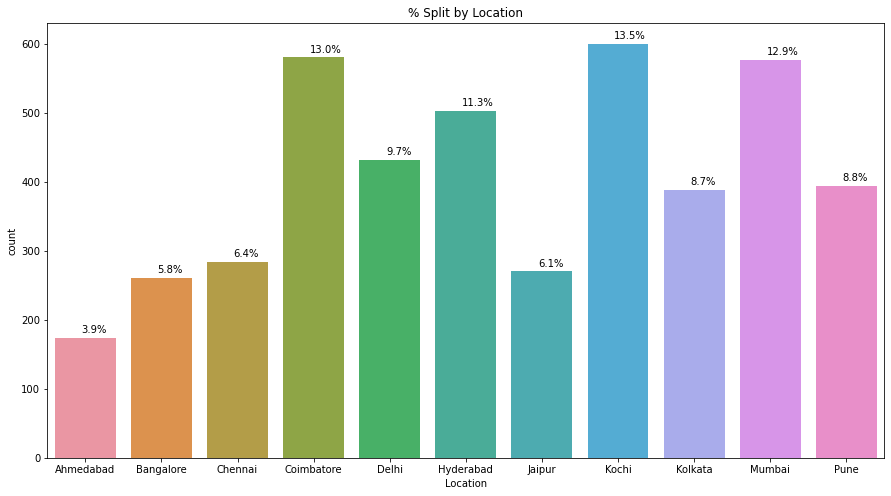

In [216]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
ax = sns.countplot(df['Location']); # Name each chart ax so that percentage function will compare each bar against respective total
plotpercentages(ax,df['Location'])
plt.title('% Split by Location');

- **Mumbai (13%) and Hyderabad (12%)** show up more frequently within the dataset, whereas **Ahmedabad (4%) and Bangalore (6%)** show up the least often
    - The remaining 7 locations appear to have similar transactions counts in the same in general, ranging from 7% to 11%
- **(Very subjective): Mumbai, Delhi, Bangalore, and Chennai are viewed as some of more expensive cities, whereas Kochi and Kolkata seen to be a lot cheaper by comparison**
    - This should have an **affect on average used vehicle pricing** and something to be reviewed/tested in the model

#### Fuel_Type

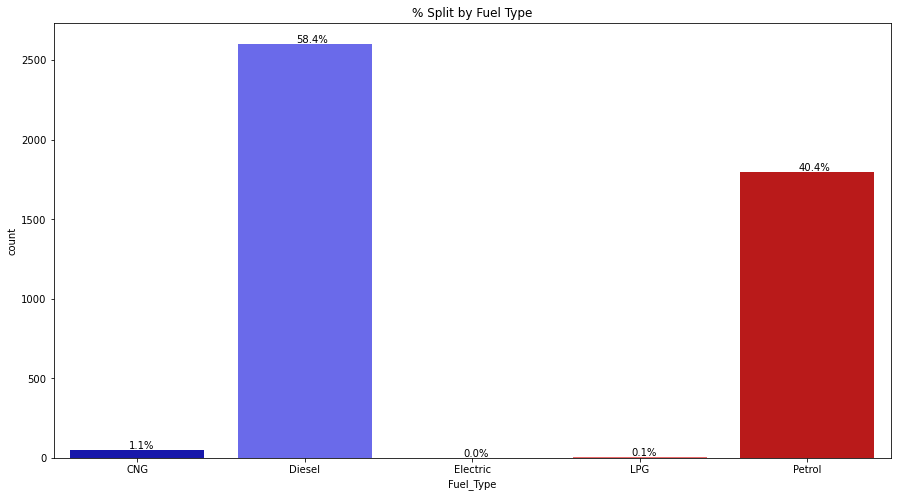

In [217]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
ax = sns.countplot(df['Fuel_Type'], palette='seismic'); # Name each chart ax so that percentage function will compare each bar against respective total
plotpercentages(ax,df['Fuel_Type'])
plt.title('% Split by Fuel Type');

- Diesel (53%) and Petrol (46%) make up the bulk of the 4 different fuel types for vehicles sampled

In [218]:
# Group Third and Fourth/Above owners into one catch-all group called 'Third or Higher'

df['Fuel_Type'].replace(to_replace='CNG',\
                         value='Other', inplace=True)

df['Fuel_Type'].replace(to_replace='LPG',\
                         value='Other', inplace=True)

df['Fuel_Type'].replace(to_replace='Electric',\
                         value='Other', inplace=True)

df['Fuel_Type'].value_counts() # Examine the value counts to make certain the changes took

Diesel    2604
Petrol    1800
Other       56
Name: Fuel_Type, dtype: int64

#### Transmission

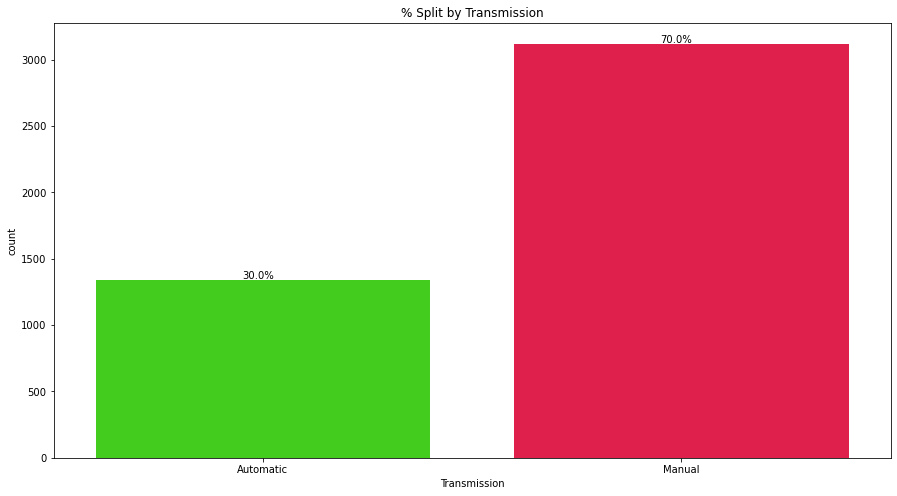

In [219]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
ax = sns.countplot(df['Transmission'], palette='prism'); # Name each chart ax so that percentage function will compare each bar against respective total
plotpercentages(ax,df['Transmission'])
plt.title('% Split by Transmission');

- **Manual transmission cars** make up the majority of the data within the sample (**approximately 71%**)
- Manual transmission cars are historically thought of as being more affordable and having better mileage performance (depending on driving ability), however this will need to be analyzed further in conjunction with other variables

#### Owner_Type

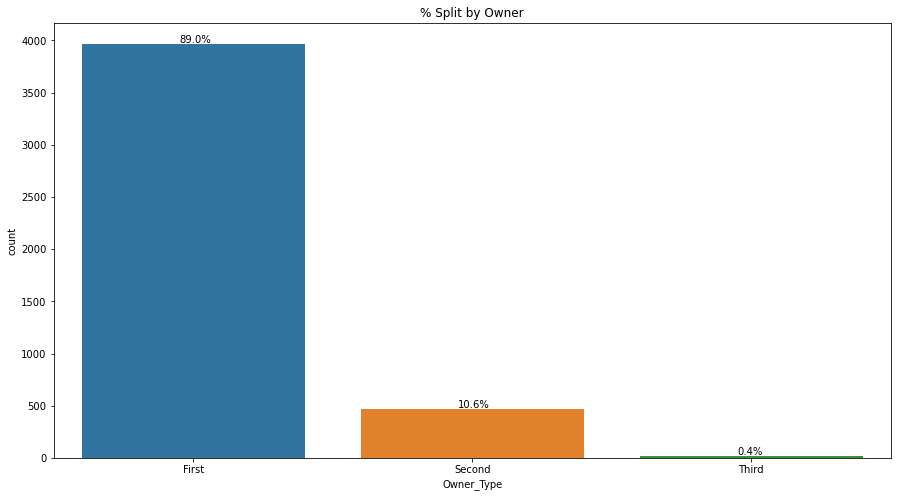

In [220]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
ax = sns.countplot(df['Owner_Type']); # Name each chart ax so that percentage function will compare each bar against respective total
plotpercentages(ax,df['Owner_Type'])
plt.title('% Split by Owner');

- 82% of the sample dataset is comprised of first owners (i.e. the car hasn't been sold as a used car previously)
- Nearly 16% of the dataset is comprised of second owners (the car has been sold twice - once new and once 2nd hand)
- There is very little data consisting of third or fourth/above owernership of the vehicles sampled

- The majority of cars are **5 seated**, as to be expected, at **85%**
- Over **11% of cars sampled have 7 seats** - the second highest distribution in the dataset
- The remaining seat configurations account for only a small percentage of the sampled dataset

In [221]:
# Group Third and Fourth/Above owners into one catch-all group called 'Third or Higher'

df['Owner_Type'].replace(to_replace='Fourth & Above',\
                         value='Third or Higher', inplace=True)

df['Owner_Type'].replace(to_replace='Third',\
                         value='Third or Higher', inplace=True)

df['Owner_Type'].value_counts() # Examine the value counts to make certain the changes took

First              3969
Second              473
Third or Higher      18
Name: Owner_Type, dtype: int64

### Numerical

In [222]:
# Create a simple function to combine summary histogram/boxplot graphs for numeric variables inputted

def histbox(feature, figsize = (15,8), bins = None): # Setting plot size, bins set to 0 to not force data into set columns range
    
    f, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, 
                                          sharex = True,
                                          figsize = figsize) # Subplot created with 2 rows and a shared x axis, figsize set above
    sns.distplot(feature, kde=True, ax=ax_hist1, bins=bins) # KDE included for estimated distributed on Histogram
    ax_hist1.axvline(np.mean(feature), color = 'red') 
    ax_hist1.axvline(np.median(feature), color = 'green') # Mean (red) and Median (green) lines added to graph
    sns.boxplot(feature,ax=ax_box1, showmeans=True, color='orange') # Mean shown on Box Plot - full box is orange
    plt.grid() # Included a grid on Histogram

#### Year

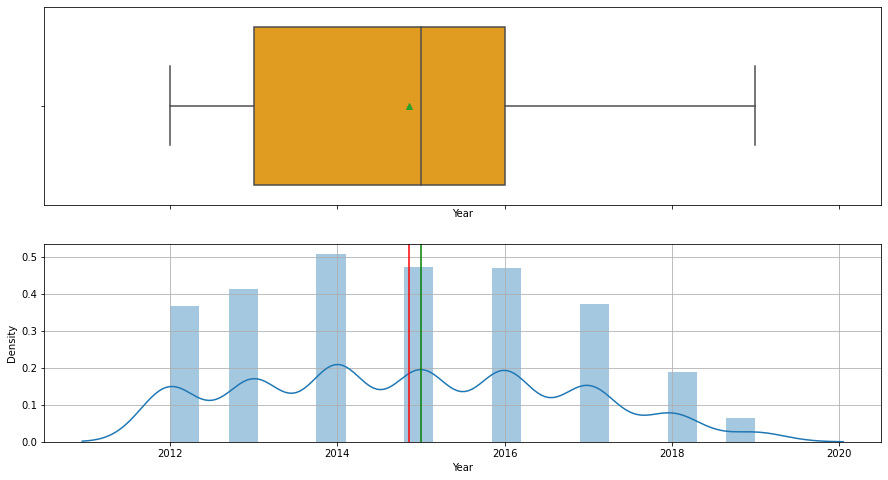

In [223]:
histbox(df['Year']) # Run above function for the Year column in the sample

- The Median is still slightly higher than the Mean, however both are now showing within the year 2014

#### KM/Price

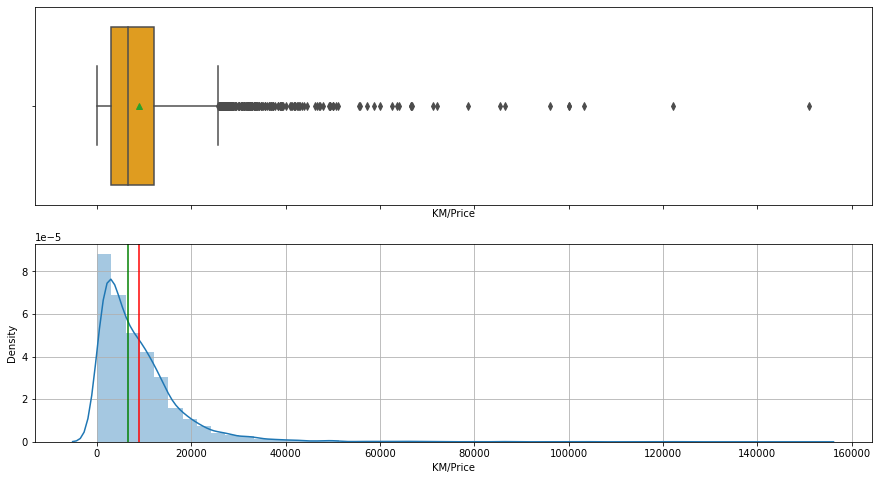

In [224]:
# Run the same function as above for the Kilometers_Driven column but with a maximum limit of 125,000

histbox(df['KM/Price']) 

- The KM/Price variable is largely right skewed (Mean higher than Median), with a large count of outliers after approximately 25,000
    - A scaled down boxplot will better determine true outliers to account for

#### KM/Price - Scaled Down

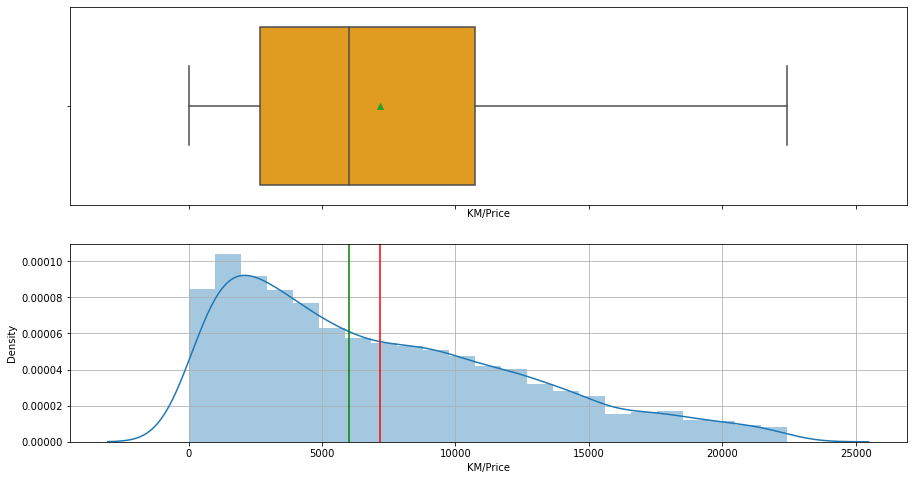

In [225]:
# Run the same function as above for the KM/Price column but with a maximum limit of 22,500

histbox(df['KM/Price'][df['KM/Price']<=22500]) # Use a maximum of 22,500 to limit large outliers in data

#### Mileage

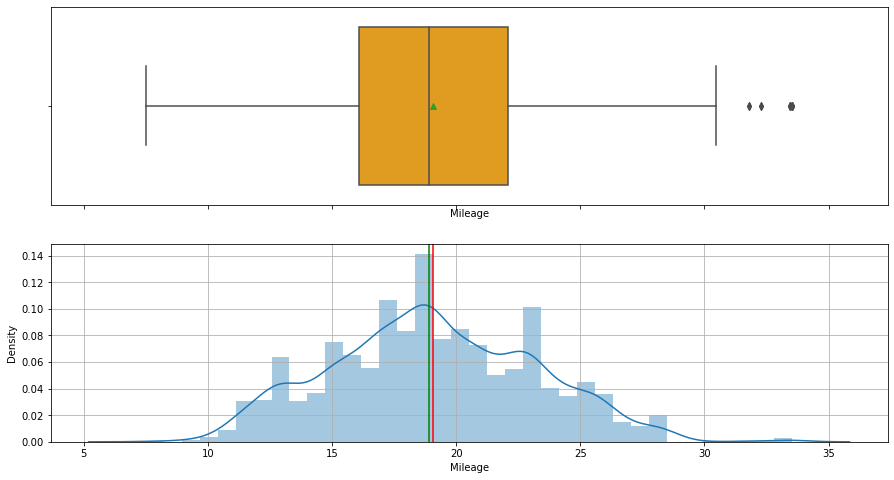

In [226]:
histbox(df['Mileage']) # Run above function for the Mileage column in the sample

Mileage appears to be relatively **normally distributed with almost no skewness** (Mean only a fraction higher than Median)

There are, however some outliers past approximately 29 (kmpl or kg/wt)

#### Mileage - Scaled Down

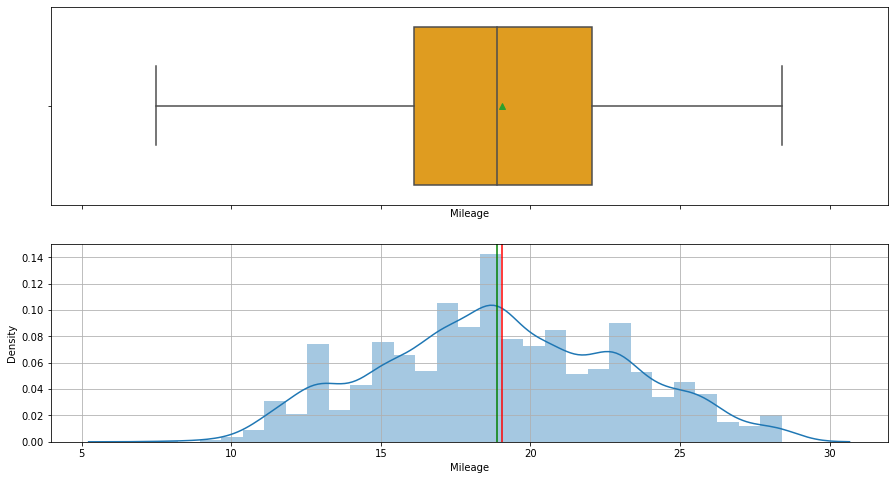

In [227]:
histbox(df['Mileage'][df['Mileage']<=30]) # Run above function for the Mileage column in the sample

#### Engine

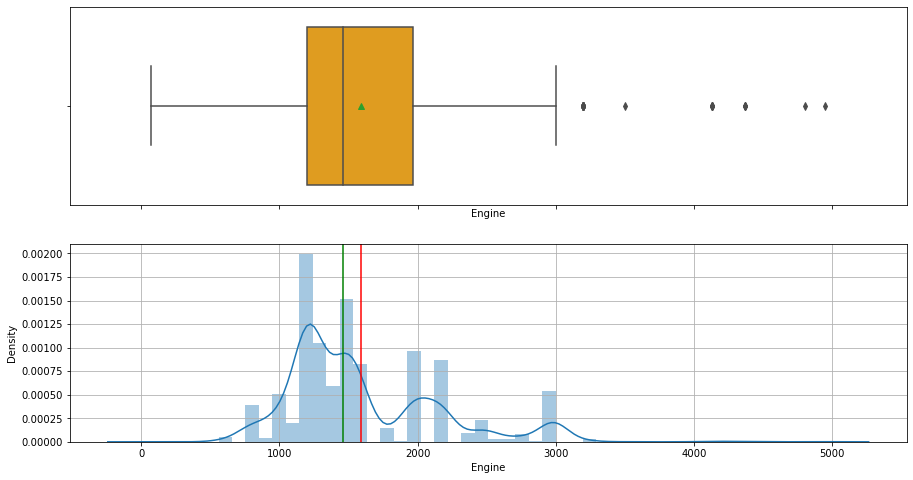

In [228]:
histbox(df['Engine']) # Run above function for the Engine column in the sample

The data is right skewed (Mean larger than Median), with many outliers past the 3000CC range.
- It may be worth removing the outliers past 2,800 or so

#### Engine - Scaled Down

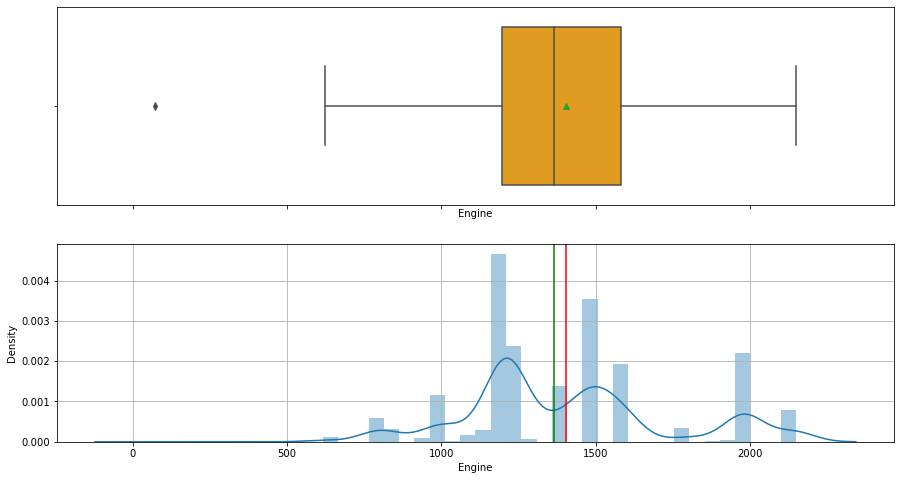

In [229]:
# Run the same function as above for the Engine column but with a maximum limit of 2,150

histbox(df['Engine'][df['Engine']<=2150]) # Use a maximum of 2,150 to limit large outliers in data

The Engine column, even with scaling reductions, is also right skewed (Mean higher than Median), however it has multiple peaks/troughs in the dataset making it harder to derive specific relationships currently based on the plots above.

#### Power

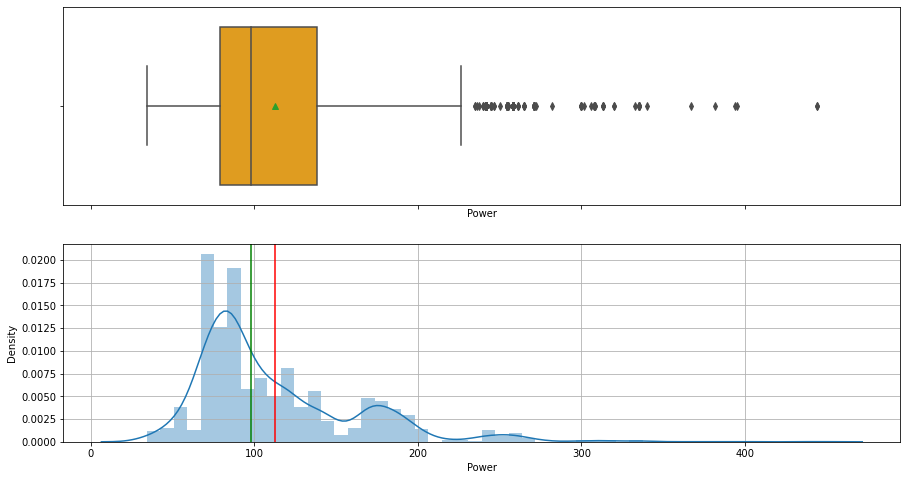

In [230]:
histbox(df['Power']) # Run above function for the Power column in the sample

There are many outliers in the Power column after approximately 220 BHP, making it right skewed (Mean higher than Median).

#### Power - Scaled Down

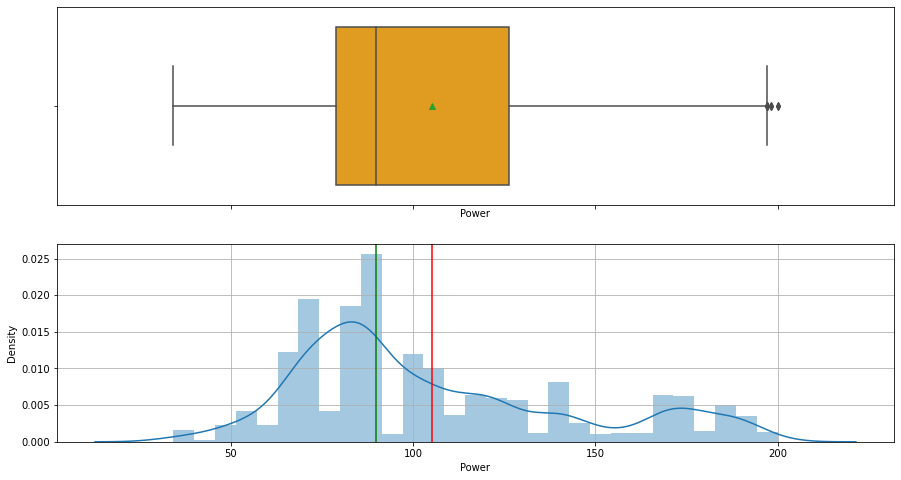

In [231]:
histbox(df['Power'][df['Power']<=200])
# histbox(df['Power'][(df['Power']>=34) & (df['Power']<=200)]) # Run above function for the Power column in the sample

#### Price

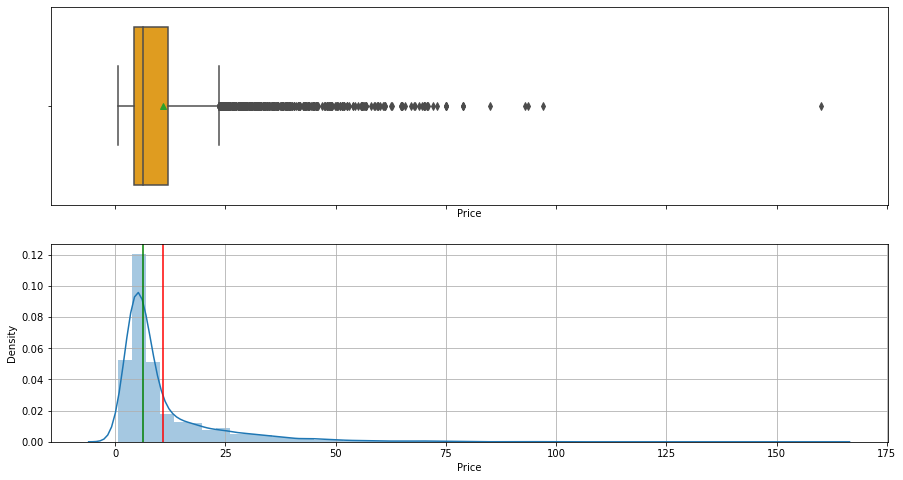

In [232]:
histbox(df['Price']) # Run above function for the Price column in the sample

The Price column is largely right skewed (Mean greater than Median), with many outliers past the approximately 15 Lakhs.
- Further scaling of some sorts is required

#### Price - Scaled Down

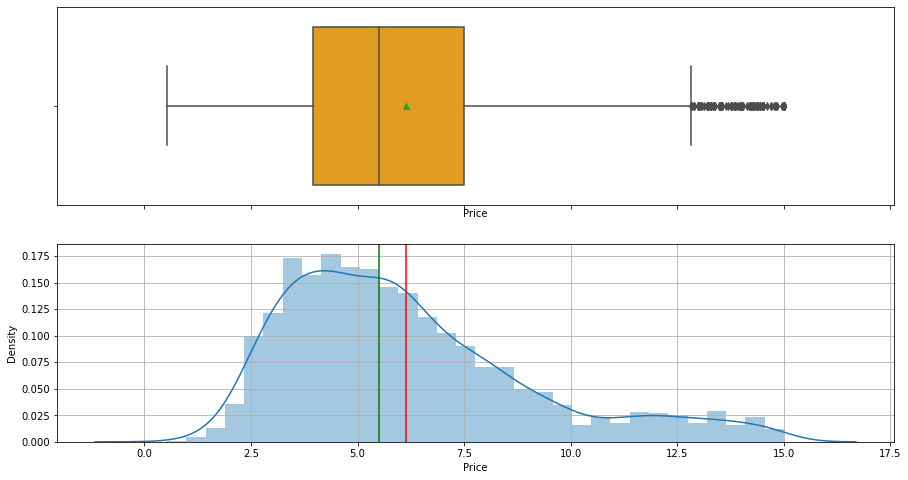

In [233]:
# Run the same function as above for the Price column but with a maximum limit of 15

histbox(df['Price'][df['Price']<= 15]) # Use a maximum of 15 to limit large outliers in data

Although scaling down the Price column to a maximum of 15 Lakhs so a more reasonable (slightly normalized) distribution, as it is the Target/Label variable, it should most likely be left as is for regression model purposes.

In [234]:
df['Price'][df['Price']<=15].describe() # Analyze the summary statistics of the smaller Price column with outliers removed

# No changes to the data, just a summary check-in

count    3566.000000
mean        6.128724
std         2.890781
min         0.530000
25%         3.960000
50%         5.500000
75%         7.500000
max        15.000000
Name: Price, dtype: float64

The truncated dataset looks to be closer to normally distributed when a limit of 15 is applied to the Price variable.
- As expected with a normally distributed dataset, the Mean and Median are very similarly positioned at 5.5 and 5.65 respectively
- This may support the argument towards **removing any rows with outliers greater then a price of 15 Lakhs**.

In [235]:
df.describe(include='all') # Inspect the data via statistical summary, with categories included

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM/Price,Brand
count,4460,4460.000000,4460,4460,4460,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460
unique,11,NaN,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Kochi,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,Economy
freq,600,NaN,2604,3121,3969,NaN,NaN,NaN,NaN,NaN,NaN,3401
mean,NaN,2014.857623,NaN,NaN,NaN,19.083084,1593.889975,112.390430,5.290583,10.871422,8870.030395,NaN
std,NaN,1.878490,NaN,NaN,NaN,4.121911,561.411401,49.893204,0.768785,11.725603,9290.609587,NaN
min,NaN,2012.000000,NaN,NaN,NaN,7.500000,72.000000,34.200000,4.000000,0.530000,22.857143,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,16.100000,1198.000000,78.900000,5.000000,4.350000,2866.854764,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,18.900000,1461.000000,97.700000,5.000000,6.350000,6517.809299,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,22.100000,1968.000000,138.030000,5.000000,12.000000,12000.000000,NaN


## EDA - Bivariate

In [236]:
corr = df.corr() # Inspect the correlation between all numerical fields within the dataset
corr

,Year,Mileage,Engine,Power,Seats,Price,KM/Price
Year,1.000000,0.079017,-0.043802,0.001051,0.001013,0.217809,-0.414638
Mileage,0.079017,1.000000,-0.651910,-0.585060,-0.414830,-0.438502,0.258825
Engine,-0.043802,-0.651910,1.000000,0.867275,0.473069,0.723304,-0.307076
Power,0.001051,-0.585060,0.867275,1.000000,0.188913,0.833683,-0.388689
Seats,0.001013,-0.414830,0.473069,0.188913,1.000000,0.113328,-0.073150
Price,0.217809,-0.438502,0.723304,0.833683,0.113328,1.000000,-0.405975
KM/Price,-0.414638,0.258825,-0.307076,-0.388689,-0.073150,-0.405975,1.000000


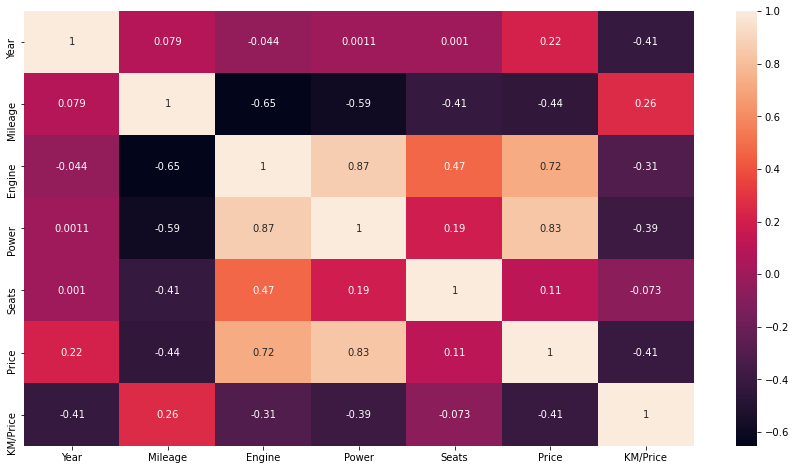

In [237]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.heatmap(corr, annot=True); 

- **Engine and Power have a strong correlation** with each other as well as with the vehicle **Price**
    - There is the **possibility of multicollinearity** between each variable, when regression modeling to predict Pricing

<Figure size 1440x720 with 0 Axes>

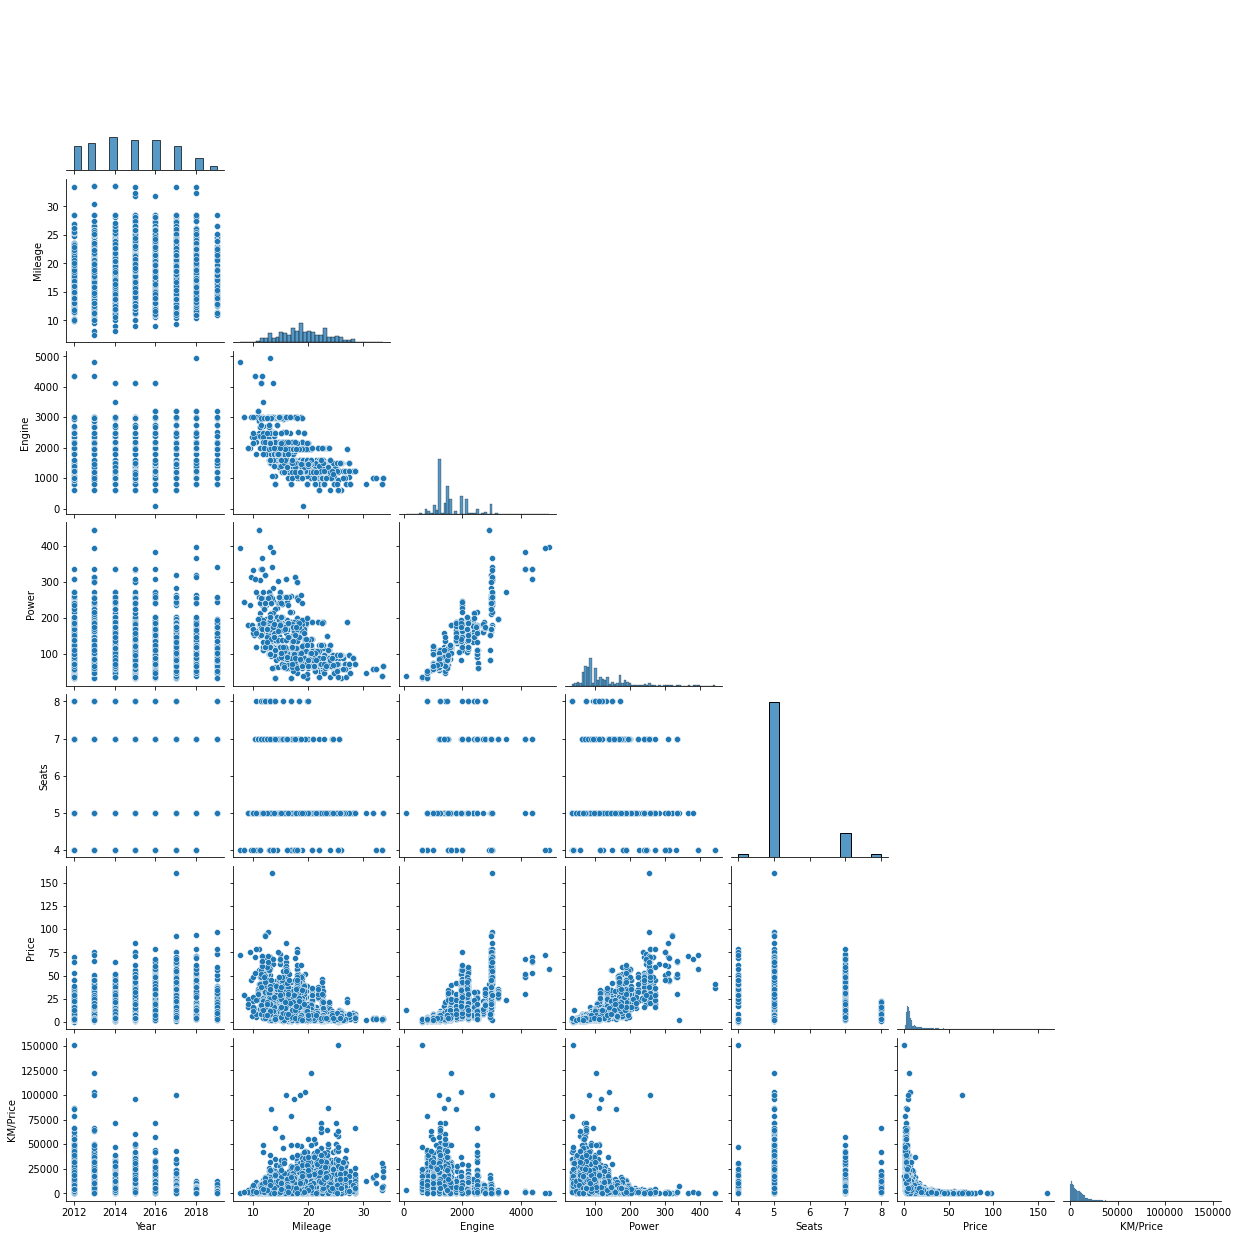

In [238]:
plt.figure(figsize=(20,10));
sns.pairplot(df,corner=True); # Visualize the correlations using a pairplot with second half of plot removed (corner=True)

### Observations

- There appears to be **some linear correlations between Price and Year, Engine, and Power**, although there are various outliers
    - Each variable conceptually makes sense as a driver of higher price in cars, whether being newer, faster/efficient, or more powerful
- **Kilometers_Driven includes a large variety of outliers, greatly skewing the data** and requiring alteration before being a valuable variable to work with
- Power, Engine, and Price, have strong correlations (potentially multicollinearity for Price predictions), which is somewhat expected from our general knowledge of cars today
    - These variable can be grouped into smaller categorizations to make for easier visual analysis in regards to Price
- **Mileage has a somewhat negative correlation to Price**, which makes sense with more miles driven depreciating a car's value further, in most cases

### Testing & Grouping Column Data into Subsets 

In [239]:
# Sum to count of different Year ranges for smaller summary groupings

print('Year equal to 2006 or less: {}'.format(df['Year'][df['Year']<=2006].value_counts().sum()))
print('Year between 2006 and 2014: {}'.format(df['Year'][(df['Year']>2006) & (df['Year']<=2014)].value_counts().sum()))
print('Year between 2014 and 2018: {}'.format(df['Year'][(df['Year']>2014) & (df['Year']<=2018)].value_counts().sum()))
print('Year above 2018: {}'.format(df['Year'][df['Year']>2018].value_counts().sum()))
print('Total Year Count: {}'.format(df['Year'].value_counts().sum()))

Year equal to 2006 or less: 0
Year between 2006 and 2014: 2014
Year between 2014 and 2018: 2347
Year above 2018: 99
Total Year Count: 4460


In [240]:
# Sum to count of different Mileage ranges for smaller summary groupings

print('Mileage equal to 10 or less: {}'.format(df['Mileage'][df['Mileage']<=10].value_counts().sum()))
print('Mileage between 10 and 20: {}'.format(df['Mileage'][(df['Mileage']>10) & (df['Mileage']<=20)].value_counts().sum()))
print('Mileage between 20 and 30: {}'.format(df['Mileage'][(df['Mileage']>20) & (df['Mileage']<=30)].value_counts().sum()))
print('Mileage above 30: {}'.format(df['Mileage'][df['Mileage']>30].value_counts().sum()))
print('Total Mileage Count: {}'.format(df['Mileage'].value_counts().sum()))

Mileage equal to 10 or less: 16
Mileage between 10 and 20: 2693
Mileage between 20 and 30: 1737
Mileage above 30: 14
Total Mileage Count: 4460


In [241]:
# Sum to count of different Engine (size) ranges for smaller summary groupings

print('Engine Size equal to 750 or less: {}'.format(df['Engine'][df['Engine']<=750].value_counts().sum()))
print('Engine Size between 750 and 2,000: {}'.format(df['Engine'][(df['Engine']>750) & (df['Engine']<=2000)].value_counts().sum()))
print('Engine Size between 2,000 and 3,000: {}'.format(df['Engine'][(df['Engine']>2000) & (df['Engine']<=3000)].value_counts().sum()))
print('Engine Size above 3,000: {}'.format(df['Engine'][df['Engine']>3000].value_counts().sum()))
print('Total Engine Size Count: {}'.format(df['Engine'].value_counts().sum()))

Engine Size equal to 750 or less: 22
Engine Size between 750 and 2,000: 3595
Engine Size between 2,000 and 3,000: 815
Engine Size above 3,000: 28
Total Engine Size Count: 4460


In [242]:
# Sum to count of different Power ranges for smaller summary groupings

print('Power equal to 50 or less: {}'.format(df['Power'][df['Power']<=50].value_counts().sum()))
print('Power between 50 and 150: {}'.format(df['Power'][(df['Power']>50) & (df['Power']<=150)].value_counts().sum()))
print('Power between 150 and 220: {}'.format(df['Power'][(df['Power']>150) & (df['Power']<=220)].value_counts().sum()))
print('Power above 220: {}'.format(df['Power'][df['Power']>220].value_counts().sum()))
print('Total Power Count: {}'.format(df['Power'].value_counts().sum()))

Power equal to 50 or less: 100
Power between 50 and 150: 3484
Power between 150 and 220: 708
Power above 220: 168
Total Power Count: 4460


### Observations
- The majority of car manufactured years lie in the range of 2012-2017, with most built in 2010 or later
- **The Year, Mileage, Engine, and Power columns will be split into Smaller Groups and dropped**
- The majority of the **Years** are within the range of:
    - 2006 and 2014 (55%)
    - 2014 and 2018 (40%)
        - Although a smaller range of years, this is **indicative of the sample dataset containing mostly newer model years**
    - There is only 5% of the data remaining in the ranges: <= 2006 and > 2018
- The majority of the **Mileage** is within the range of:
    - **10 and 20 (66%)**
    - 20 and 30 (32%)
    - There is very little data in the ranges: <= 10 and > 30
- The majority of the **Engine Sizes** are within the range of:
    - **750 and 2,000 (80%)**
    - 2,000 and 3,250 (19%)
    - There is very little data in the ranges: <= 750 and > 3,250
- The majority of **Engine Power/Output** is within the range of:
    - **50 and 150 (77%)**
    - 150 and 250 (17%)
    - There is only a small amount of data in the ranges: <= 50 and > 250   

In [243]:
df.describe(include='all') # Review statistical summaries (Mean/Median) for each of the new categories added (subgroups)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,KM/Price,Brand
count,4460,4460.000000,4460,4460,4460,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460
unique,11,NaN,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Kochi,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,Economy
freq,600,NaN,2604,3121,3969,NaN,NaN,NaN,NaN,NaN,NaN,3401
mean,NaN,2014.857623,NaN,NaN,NaN,19.083084,1593.889975,112.390430,5.290583,10.871422,8870.030395,NaN
std,NaN,1.878490,NaN,NaN,NaN,4.121911,561.411401,49.893204,0.768785,11.725603,9290.609587,NaN
min,NaN,2012.000000,NaN,NaN,NaN,7.500000,72.000000,34.200000,4.000000,0.530000,22.857143,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,16.100000,1198.000000,78.900000,5.000000,4.350000,2866.854764,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,18.900000,1461.000000,97.700000,5.000000,6.350000,6517.809299,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,22.100000,1968.000000,138.030000,5.000000,12.000000,12000.000000,NaN


The Mean and Median, for the most part, are very close for each of the different numerical variables.

In [244]:
df.info() # Inspect data details for total row count and all datatypes, objects set to category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 1 to 6017
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Location      4460 non-null   category
 1   Year          4460 non-null   int64   
 2   Fuel_Type     4460 non-null   category
 3   Transmission  4460 non-null   category
 4   Owner_Type    4460 non-null   category
 5   Mileage       4460 non-null   float64 
 6   Engine        4460 non-null   float64 
 7   Power         4460 non-null   float64 
 8   Seats         4460 non-null   float64 
 9   Price         4460 non-null   float64 
 10  KM/Price      4460 non-null   float64 
 11  Brand         4460 non-null   category
dtypes: category(5), float64(6), int64(1)
memory usage: 461.4 KB


### Further Visual Examination: Multivariate Correlations to Price

#### Price and KM Driven by Transmission Type

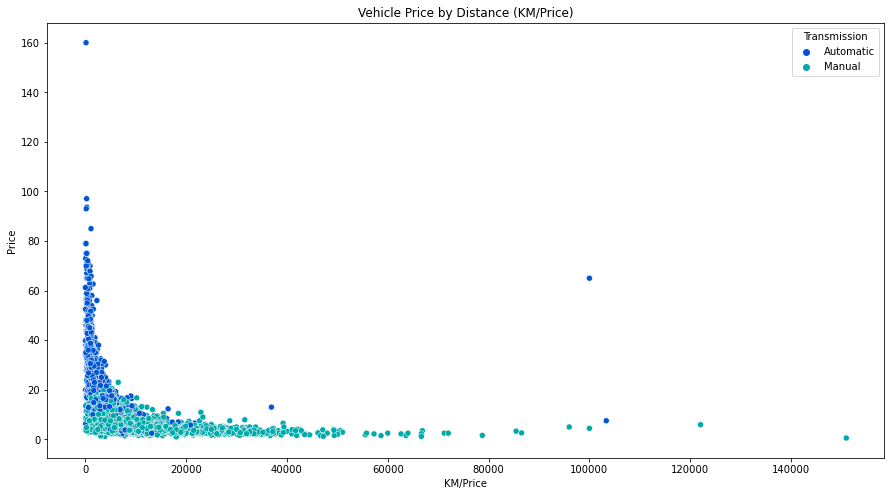

In [245]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.scatterplot(x=df['KM/Price'], y=df['Price'], hue=df['Transmission'], palette='winter');
plt.title('Vehicle Price by Distance (KM/Price)');

- Cars with **automatic transmissions are more expensive on average**, as is normally expected
- As is usually the case, the **lower kilometers driven (shown as KM/Price) on a vehicle, the higher the price**
    - The inverse is very apparent with prices dropping steeply on average as the distance travelled increases
    - This is particularly apparent in the range of 0 to 80k kilometers traveled

#### Price and Mileage by Transmission Type

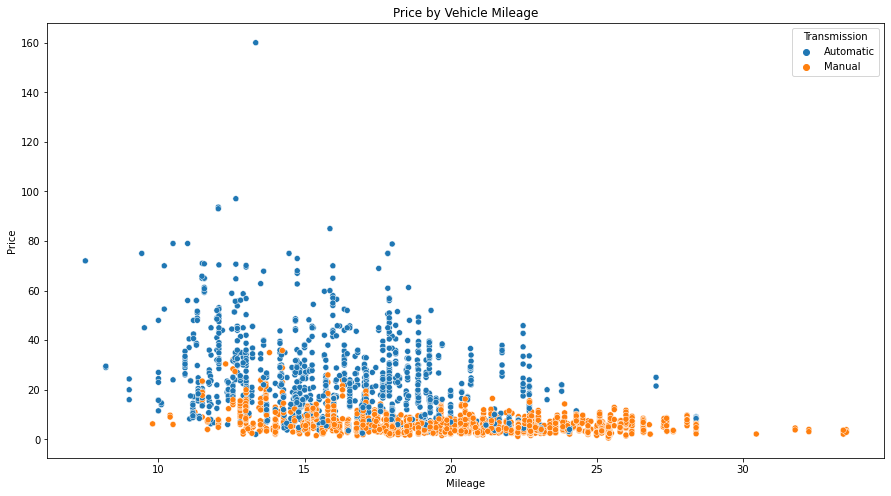

In [246]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.scatterplot(x='Mileage', y='Price', hue='Transmission', data=df);
plt.title('Price by Vehicle Mileage');

- Cars with manual transmissions appear to have higher mileage performance on average
- Higher vehicle mileage performance doesn't always drive higher pricing
    - Other factors, such as having an automatic transmission, can have a more significant pricing impact than simply offering higher mileage

#### Price and Engine by Brand

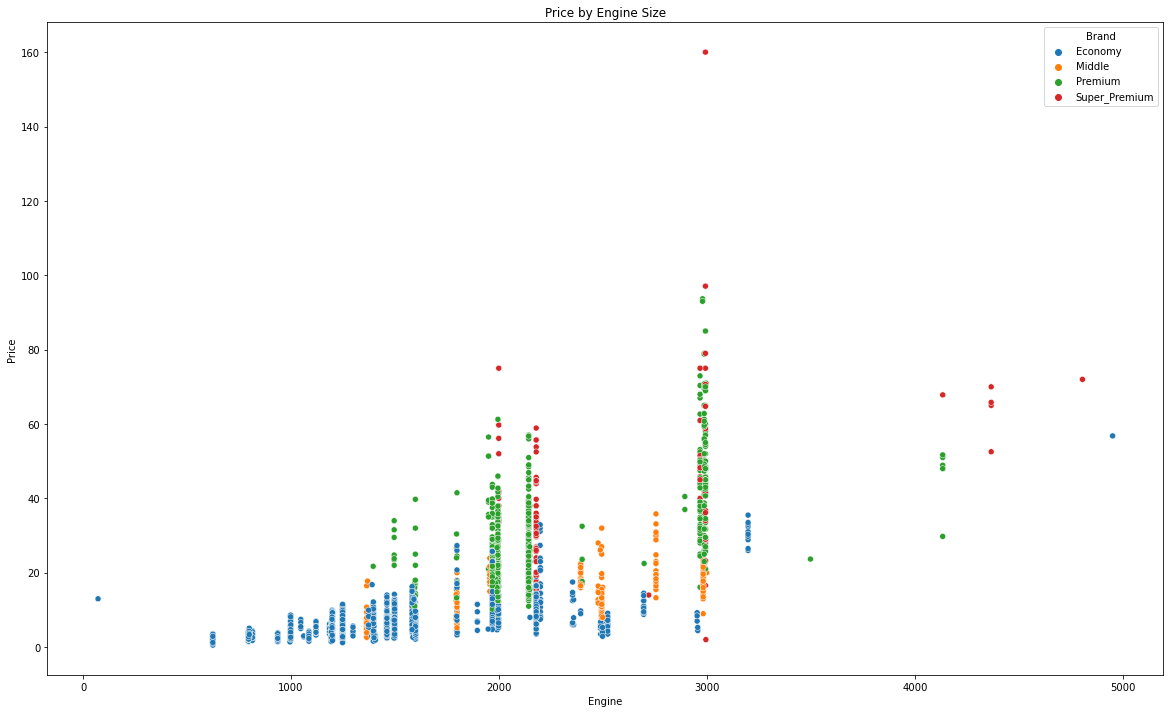

In [247]:
plt.figure(figsize=(20,12)); # Setting plot size -  larger than standard due to Brands in Hue
sns.scatterplot(x='Engine', y='Price', hue='Brand', data=df);
plt.title('Price by Engine Size');

- The majority of vehicles sampled have an **engine size ranging from around 500 CC to 3000 CC**, with respective pricing ranging from **0 to 60 Lakhs on average**, with more expensive **(Luxury) brands (outliers) ranging from 60 to 100 Lakhs**
- There are also more expensive **(Performance) brands with engines sizes well above the average, ranging from 3000 CC and over 5000 CC**
- There are also cases where cheaper cars in the 0 to 40 Lakh range, having larger engine sizes between 3000 CC and over 5000 CC


#### Price and Power by Brand

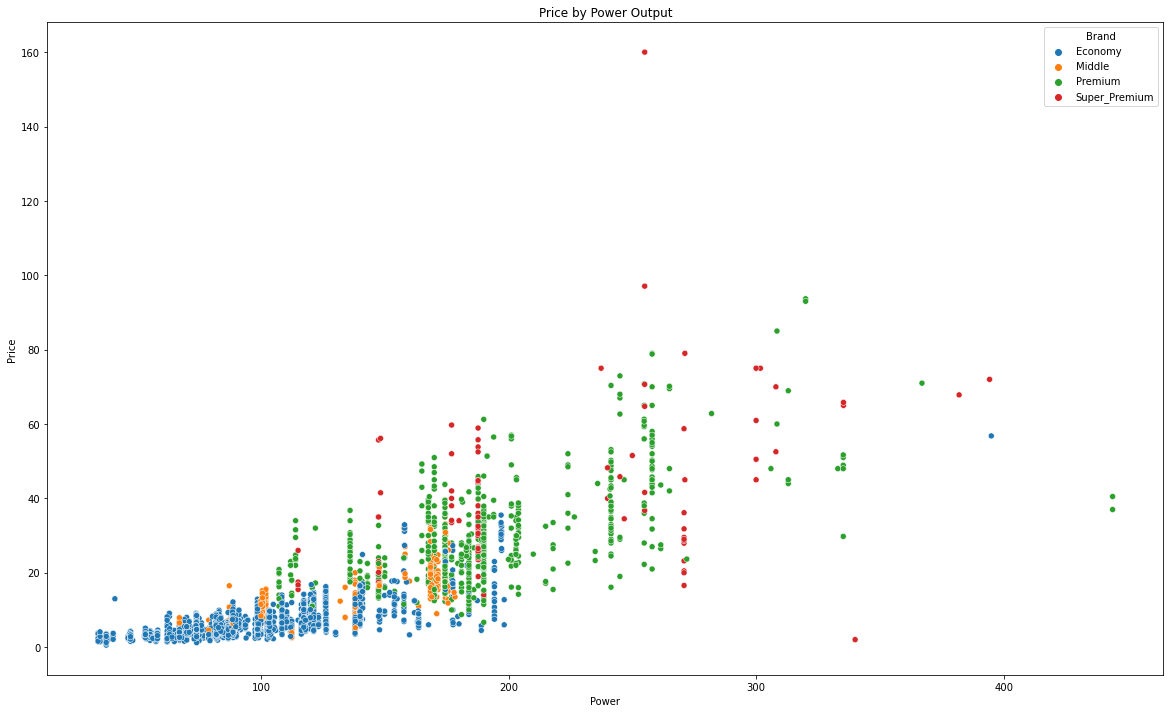

In [248]:
plt.figure(figsize=(20,12)); # Setting plot size -  larger than standard due to Brands in Hue
sns.scatterplot(x='Power', y='Price', hue='Brand', data=df);
plt.title('Price by Power Output');

Similar to the Engine/Pricing analysis above, the majority of vehicles sampled have **power outputs ranging from around 50 BHP to around 300 BHP, with respective pricing ranging from 0 to 40 Lakhs on average**, with more expensive (Luxury/Performance brands (outliers) ranging from 40 to 80 Lakhs
- There are also cases where cheaper cars in the 0 to 40 Lakh range, having larger power outputs over 300 BHP


#### Engine and Power by Fuel Type

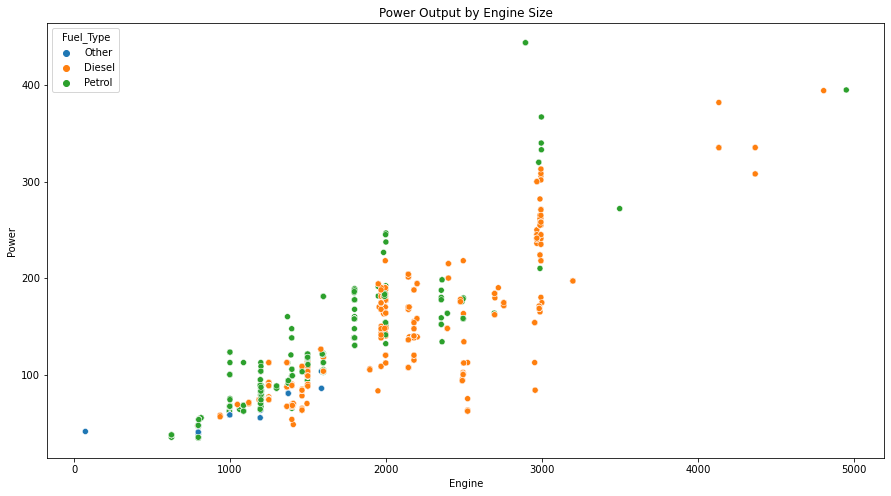

In [249]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.scatterplot(x='Engine', y='Power', hue='Fuel_Type', data=df);
plt.title('Power Output by Engine Size');

- As expected, there is a **strong positive correlation between Engine Size and Power Output (Performance)**
- The majority of the dataset falls within the **1,000 CC to 3,000 CC** range, with Power Output in ranging from around **50 BHP to 300 BHP** 
- The majority of engines sampled through the Engine/Power regression run on **Petrol and Diesel**, as is usually the case
- The small amount of data included in the sample for **CNG and LPG align with the smaller engine sizes and lower power outputs**


In addition to the strong correlation between Engine Size and Power output, Prices increase on average as either of those two variables increase.  

**The bulk of the datset is between 500 CC to 3,000 CC / 50 BHP to 300 BHP.**

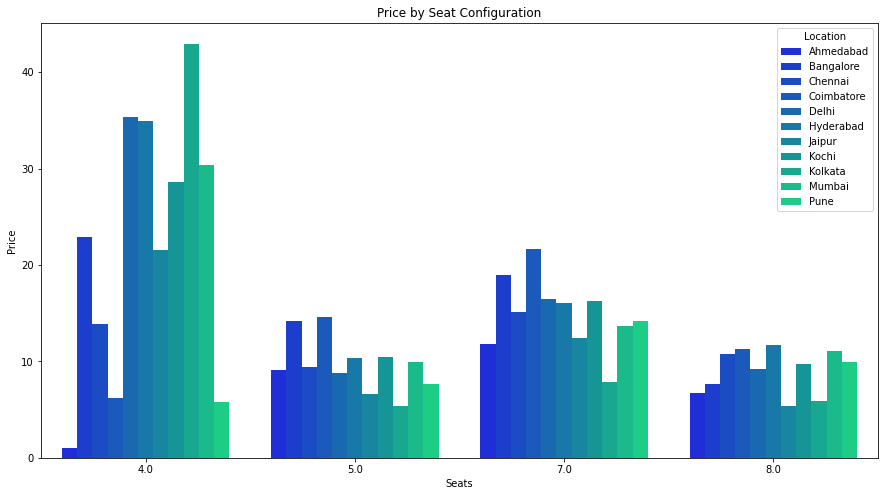

In [250]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.barplot(x='Seats', y='Price', hue='Location', ci=None, data=df, palette='winter');
plt.title('Price by Seat Configuration');

- Although 5 seater vehicles are the most common configuration sampled (75%), **7 and 8 seater vehicles consistently fetch a higher price on average, across all cities sampled**
- **4 Seaters**, usually associated with more luxury or unique brands, sell for much higher prices than the other configurations in **Kochi and Kolkata** especially which may be **indicative of a slightly more niche, premium market, in those locations**


## Comparing Engine and Power Variables - Can we Drop One of Them?

In [251]:
df[['Engine','Power']].corr() # Pull The Correlation Engine and Power variables

,Engine,Power
Engine,1.000000,0.867275
Power,0.867275,1.000000


- The **Engine and Power variables have a high correlation** based on the analysis above, which makes sense based on commmon understanding of vehicle dynamics
- It is worth testing whether, within statistical significance, one field can be dropped to better serve the Linear Regression model overall
    - Whichever item has the **lower correlation to price will be dropped and tested below.
    - Provided the model results are favorable, the column will remain dropped.

In [252]:
df[['Engine','Power','Price']].corr() # Add in Price Correlation to Engine and Power variables - Drop the Lower of the two

,Engine,Power,Price
Engine,1.000000,0.867275,0.723304
Power,0.867275,1.000000,0.833683
Price,0.723304,0.833683,1.000000


**Drop Engine Column** since it is highly correlated to Power but is **lower Correlated to Price**.

In [253]:
df=df.drop('Engine', axis=1)

## Treating Outliers: Scaling/Grouping/Dropping Data

A combination of Standard and Mix/Max scaling will be used to test for score improvements in the resuls to follow.
**These may/may not be used in the final results and may be commented out if not providing value in the regression model**.

In [254]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import the Standard Scaler function for Outlier May not Use( TBD)

In [255]:
df['KM/Price'].describe() # Examine the statistics in KM/Price column to determine low/High outliers to exclude

count      4460.000000
mean       8870.030395
std        9290.609587
min          22.857143
25%        2866.854764
50%        6517.809299
75%       12000.000000
max      150943.396226
Name: KM/Price, dtype: float64

In [256]:
# Determine outliers within the KM/Price variable (set to 1.5 x IQR)

print('Suspected Outliers')
print('KM/Price IQR: {}'.format(round(df['KM/Price'].quantile(.75)-df['KM/Price'].quantile(.25)),))
print('1.5 x IQR: {}'.format(round(((df['KM/Price'].quantile(.75)-df['KM/Price'].quantile(.25))*1.5)),2))
print('15th Quantile: {}'.format(round(df['KM/Price'].quantile(.15)),))

Suspected Outliers
KM/Price IQR: 9133
1.5 x IQR: 13700
15th Quantile: 1723


In [257]:
# Drop outliers past outside of 4xIQR qbove 36.5k for KM/Price variable

# Drop certain specific outlier rows (axis=0), and adjust the dataset (inplace=True)
df.drop(df[df['KM/Price']>=13700].index, axis=0, inplace=True)

# Also drop the 10th quantile which represents very low figures, possibly skewing the dataset
df.drop(df[df['KM/Price']<=1723].index, axis=0, inplace=True)

## Testing & Training Model for Price Predictions

In [258]:
# Create a split for testing (X (all independent variables) and y (target/dependent variable))

X = df.drop('Price',axis=1)
y = df[['Price']] # Use double square brakets to create Dataframe, Not Series

print(X.head()) # Print the top 5 rows of the X/independent variables
print('')
print(y.head()) # Print the top 5 rows of the y target/dependent variable

      Location  Year Fuel_Type Transmission Owner_Type  Mileage   Power  \
1         Pune  2015    Diesel       Manual      First    19.67  126.20   
4   Coimbatore  2013    Diesel    Automatic     Second    15.20  140.80   
7       Mumbai  2016    Diesel    Automatic      First    11.36  171.50   
8         Pune  2013    Diesel       Manual      First    20.54  103.60   
10       Kochi  2018    Petrol       Manual      First    21.56  103.25   

    Seats      KM/Price    Brand  
1     5.0   3280.000000  Economy  
4     5.0   2292.559188  Premium  
7     8.0   2057.142857   Middle  
8     5.0  12390.384615  Economy  
10    5.0   2582.110553  Economy  

    Price
1   12.50
4   17.74
7   17.50
8    5.20
10   9.95


In [259]:
# Check the shape of both sets

print(X.shape)
print(y.shape)

(2934, 10)
(2934, 1)


In [260]:
# Convert catetorical columns, using binary dummy columns, to numerical values in order for accurate model processing 

X = pd.get_dummies(X, columns=['Location','Brand','Fuel_Type','Transmission','Owner_Type'], drop_first=True)


# Drop first column as it is inferred based on remaining data (i.e. 4/5 explains the 5th value)
# Not removing the first column will create 'inf' value erros in the Variable Inflation Factor summary!

Not removing the **first column** in One-Hot Encoding will **create 'inf' value errors in the Variable Inflation Factor summary**!

In [261]:
# Check the shape of both sets again with one-hot encoding applied

print(X.shape)
print(y.shape)

(2934, 23)
(2934, 1)


The **Training (X) dataset has increased by 13 columns (10 to 23)** after applying One-Hot Encoding process.

In [262]:
np.random.seed(1) # Numpy function used to make the code repeatable (i.e. random sample won't change after first load)

X.sample(10) # Review a sample of 10 rows of data to examine new dummy column details added

,Year,Mileage,Power,Seats,KM/Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Middle,Brand_Premium,Brand_Super_Premium,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third or Higher
2639,2015,18.90,82.00,5.0,3043.478261,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
5572,2013,16.96,138.03,5.0,7733.333333,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
5556,2013,18.90,82.00,5.0,8615.384615,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4165,2018,20.51,67.04,5.0,2222.222222,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
759,2016,20.40,81.80,5.0,7270.384615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3798,2018,21.10,100.00,5.0,2244.951923,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
5335,2016,17.80,117.30,5.0,5019.420290,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2378,2017,24.20,98.60,7.0,7605.988024,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
5449,2013,18.50,80.00,5.0,10898.446602,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2589,2016,22.50,67.00,5.0,1927.710843,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


### Splitting the Data into Train/Test

In [263]:
from sklearn.model_selection import train_test_split # Import the necessary functions for Split (X/y) Testing & Training

X_train, X_test, y_train, y_test = train_test_split(X, y, # Run Train/Test function for X, y splits created earlier
                                                    test_size = .30, # Testing 30% of dataset
                                                    random_state=42) # Used for reproducible data shuffling, 42 = movie reference

In [264]:
X_train.head(10) # Check top 10 rows of data within the newly created training dataset (all columns except Price, the target)

,Year,Mileage,Power,Seats,KM/Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Middle,Brand_Premium,Brand_Super_Premium,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third or Higher
1633,2017,22.70,89.840000,5.0,10005.968170,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
5219,2014,16.47,74.000000,5.0,5352.798054,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
669,2014,17.40,117.300000,5.0,9481.655844,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3520,2012,18.48,112.431559,5.0,6206.896552,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5886,2015,15.63,110.400000,5.0,3382.352941,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5681,2017,24.04,67.000000,5.0,10312.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3246,2016,18.70,88.700000,5.0,4070.645161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4158,2015,15.29,121.300000,5.0,5355.555556,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3313,2017,18.49,100.000000,7.0,6455.355130,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
499,2014,16.50,86.800000,5.0,8235.294118,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [265]:
from sklearn.linear_model import LinearRegression # Import model needed for Linear Regression analysis and model building

linearregression = LinearRegression()

linearregression.fit(X_train, y_train)  # Create empty linear regression array and fit the In/Dependent training data to it

LinearRegression()

In [266]:
linearregression.coef_ # List all Coefficients in the regression model

linearregression.intercept_ # Show the Intercept of the regression model

X_train.columns.tolist()  + ["Intercept"] # Show all columns in X_Train dataset as vertical list, including Intercept at bottom

# Create an array of all CoEfficients and the Intercept of the Regression model
model_coefs = np.append(linearregression.coef_[0], linearregression.intercept_[0]) 
model_coefs

# Create a dataframe of the Regression Coefficients and respective X-Train columns, plus the Intercept
pd.DataFrame(model_coefs, index=X_train.columns.tolist() + ["Intercept"], columns=['Coefficients'])

,Coefficients
Year,0.586546
Mileage,-0.115228
Power,0.061840
Seats,0.349086
KM/Price,-0.000258
Location_Bangalore,0.732168
Location_Chennai,0.060664
Location_Coimbatore,0.459306
Location_Delhi,-0.575976
Location_Hyderabad,1.219141


In [267]:
# Import necessary libraries for Analyzing model effectiveness - MAE, MSE, R2, etc.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create simple function to calculate Mean Absolute Percentage Error 
    # residuals calculated on the regression line (observed target (y) - predicted target (y) / target)

def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# Create a summary model to run/calculate the MAPE (above), MAE, RMSE, and R2 Results

def model_performance(model, inp, out):
    """
    Model: Model Selected
    Inp: Input (All Independent Variables)
    Out: Output (The Dependent/Target Variable)
    """
    y_pred = model.predict(inp).flatten() # Create 1 dimensional array of predicted new input X variables in regression model
    y_act = out.values.flatten() # Create 1 dimensional array of actual/observed y/Target variable in regression model

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [268]:
# Check Model Results on Trained Data (70%)

print('Train Performance')
print('')

model_performance(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.500163,19.977233,2.346728,0.850698


In [269]:
# Check Model Results on Trained Data (30%)

print('Test Performance')
print('')
model_performance(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.479305,19.273075,2.276999,0.868791


### Insights

- The initial model run produced decent **Train and Test R-squared scores of 0.85 and 0.87 respectively**, surpassing the goal of at least .80 for both, with **Train and Test being very close**.
- The Training Model's **Mean Absolute Percentage Error (MAPE) is just under 20 for both datasets**, indicating that the model can be inaccurate around 20% of the time in some instances and only predicts accurate Price readings within 80% of the Price target
    - **It is worth further exploring ways to lower the MAPE score**, will hopefully increase the R-Squared/Adjusted R-Squared scores at the same time

### Addressing Multicollinearity and Insignificant P-values (>0.5)

- First, the Statistics Summary will be run below to identify the **R-Score and Adjusted R-Score**, in addition to the P-values of each of the coefficients within the model
- Next, using the Variable Inflation Factors below, we will **remove the highest ranked variables (one at a time)** and rerun the test to ensure that if the R-Score improved that it wasn't resulting from a **degraded Adjusted R-Score (penalized for adding noise, etc.)**
- This process will be repeated for all coefficients with Inflation Factors above 5 until no more exist
- Next, any remaining coefficients within the Statistics Summary with P-Values above .5 will also be removed due to appearing insignificat within the model
    - We will **not remove variables resulting from One-Hot Encoding** process as those could unfairly skew the model, **unless every variable within that original column show high Variable Inflation Factors**
    
Note that there is a high chance of further changes to coefficients only lowering the scores achieved - the original model would then remain the chosen option for final selection.

In [125]:
# Import Variance Inflation Factor to identify key Coefficients that may need to be removed so as to improve model scores

from statsmodels.stats.outliers_influence import variance_inflation_factor

varinf_series0 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns) # Create Pandas Series (1 column list)

print("Var. Inflation Factor Scores: \n\n{}\n".format(varinf_series0))

Var. Inflation Factor Scores: 

Year                          484.730358
Mileage                        66.911239
Power                          29.539033
Seats                          89.466334
KM/Price                        6.194234
Location_Bangalore              2.381507
Location_Chennai                2.233131
Location_Coimbatore             4.240733
Location_Delhi                  3.103323
Location_Hyderabad              3.281197
Location_Jaipur                 2.230945
Location_Kochi                  4.605355
Location_Kolkata                3.182775
Location_Mumbai                 4.298613
Location_Pune                   2.772758
Brand_Middle                    1.456858
Brand_Premium                   2.503184
Brand_Super_Premium             1.186340
Fuel_Type_Diesel               74.756572
Fuel_Type_Petrol               58.848523
Transmission_Manual             6.504978
Owner_Type_Second               1.191034
Owner_Type_Third or Higher      1.023947
dtype: float64



### Insights

- Variables with the highest VIF scores can be removed first (1 at a time) to determine if the score results improve
    - **Year would be first to be removed** as it is much higher than any other variables shown
- If any fields are removed in attempts at increasing model accuracy, they'll likely come from the Stats Summary Model and have a P-value greater than .05, incrementally with the highest p-Value first
    - Variables cannot be removed if having had One-Hot Encoding performed, unless the entire column set is removed

In [126]:
import statsmodels.api as sm

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     502.6
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        13:38:24   Log-Likelihood:                -4664.3
No. Observations:                2053   AIC:                             9377.
Df Residuals:                    2029   BIC:                             9512.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Drop HIghest P-value (Seats)

In [127]:
# The highest VIF, or P-Value if no VIF issues, will be dropped to determine if the R-Squared Score Improves

X_train1 = X_train.drop('Year', axis=1)
varinf_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("VIF Scores: \n\n{}\n".format(varinf_series1))

VIF Scores: 

const                         509.332119
Mileage                         2.972330
Power                           3.444767
Seats                           1.949488
KM/Price                        1.273570
Location_Bangalore              2.176777
Location_Chennai                2.102262
Location_Coimbatore             3.452016
Location_Delhi                  2.745747
Location_Hyderabad              2.950223
Location_Jaipur                 2.085272
Location_Kochi                  3.783428
Location_Kolkata                2.838758
Location_Mumbai                 3.541476
Location_Pune                   2.540298
Brand_Middle                    1.334477
Brand_Premium                   2.168956
Brand_Super_Premium             1.183131
Fuel_Type_Diesel               40.700447
Fuel_Type_Petrol               40.790456
Transmission_Manual             1.789605
Owner_Type_Second               1.072929
Owner_Type_Third or Higher      1.009936
dtype: float64



The VIF scores improved drastically, however there are still a few showing well above 5
- Some of these, such as Fuel items cannot be removed due to being from an encoded column

In [128]:
# Review the Stats Model Summary with Year removed

olsmod1 = sm.OLS(y_train, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     470.5
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        13:38:25   Log-Likelihood:                -4760.5
No. Observations:                2053   AIC:                             9567.
Df Residuals:                    2030   BIC:                             9697.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [129]:
# Check Model Results on Trained Data (70%) with Year Removed

print('Train Performance')
print('')

model_performance(olsres1, X_train1.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.617936,21.583653,2.459314,0.836029


### Insights
- All scores got worse when dropping the Year variable
    - It should remain intact and others should be tested for removal against the original results

In [130]:
# Drop the next highest P-value which, to determine if the R-Squared Score Improves

X_train2 = X_train.drop('Mileage', axis=1)
varinf_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(varinf_series2))

VIF Scores: 

const                         2.471899e+06
Year                          1.848759e+00
Power                         2.587858e+00
Seats                         1.493225e+00
KM/Price                      1.801732e+00
Location_Bangalore            2.171938e+00
Location_Chennai              2.101545e+00
Location_Coimbatore           3.520575e+00
Location_Delhi                2.748871e+00
Location_Hyderabad            2.950937e+00
Location_Jaipur               2.101155e+00
Location_Kochi                3.910914e+00
Location_Kolkata              2.839263e+00
Location_Mumbai               3.538614e+00
Location_Pune                 2.543937e+00
Brand_Middle                  1.267275e+00
Brand_Premium                 2.307375e+00
Brand_Super_Premium           1.197015e+00
Fuel_Type_Diesel              4.074004e+01
Fuel_Type_Petrol              4.013737e+01
Transmission_Manual           1.771328e+00
Owner_Type_Second             1.081182e+00
Owner_Type_Third or Higher    1.012786e+

The VIF scores are all only fractionally off from 0, **indicating no Multicollinearity, which is good**.

In [131]:
# Review the Stats Model Summary with Mileage removed

olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     517.8
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        13:38:25   Log-Likelihood:                -4677.7
No. Observations:                2053   AIC:                             9401.
Df Residuals:                    2030   BIC:                             9531.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [132]:
# Check Model Results on Trained Data (70%) with Mileage Removed

print('Train Performance')
print('')

model_performance(olsres2, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.508941,20.073561,2.362032,0.848744


### Insights
- Dropping the Mileage column worsened all scores
    - This change should not be incorporated and, since no other variables, outside of those previously encoded, show issues with their VIF or p-Value scores, **the original test results will be used as the final model score**

In [133]:
residual = olsres0.resid # Examine the residual value of the first Stats Model run (olres0) above, adding 1 incrementally per test
np.mean(residual)

-1.3375876149506031e-12

The **Mean Residual score** is very close to 0.  This appears to indicate that within the model, the **majority of residuals above vs. below the line are close to netting out to 0 exactly**.

In [134]:
residual = olsres0.resid
fitted = olsres0.fittedvalues  # Check the predicted values in original results

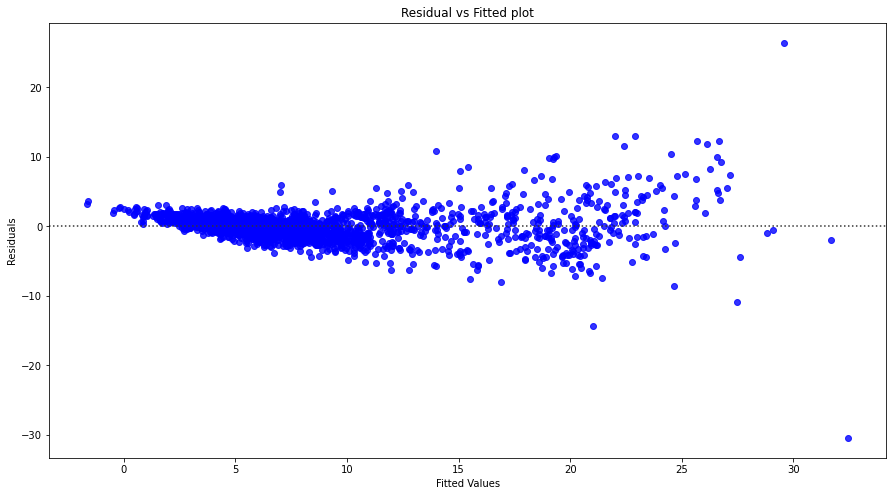

In [275]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.residplot(fitted, residual, color="blue")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
# plt.xlim(0,15)
plt.title("Residual vs Fitted plot")
plt.show()

There appears to be **some slight issues of non-linearity (patterns shown)**, particularly when the count of fitted values is lower, however a good portion of the model appears to show no common patterns between the residuals along the line.

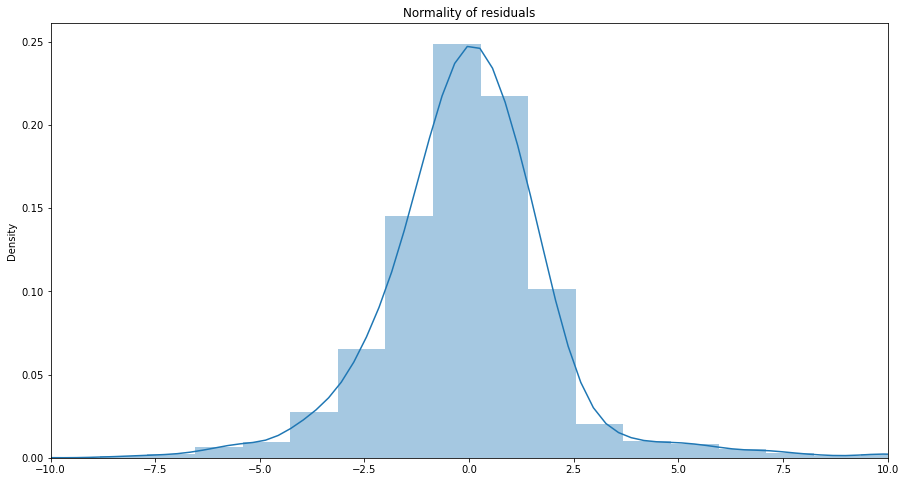

In [271]:
plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
sns.distplot(residual)
plt.title("Normality of residuals")
plt.xlim(-10,10)
plt.show()

The distribution shown above appears **mostly normally distributed**, however right skewed with **some outliers ranging from 5 to 25**.

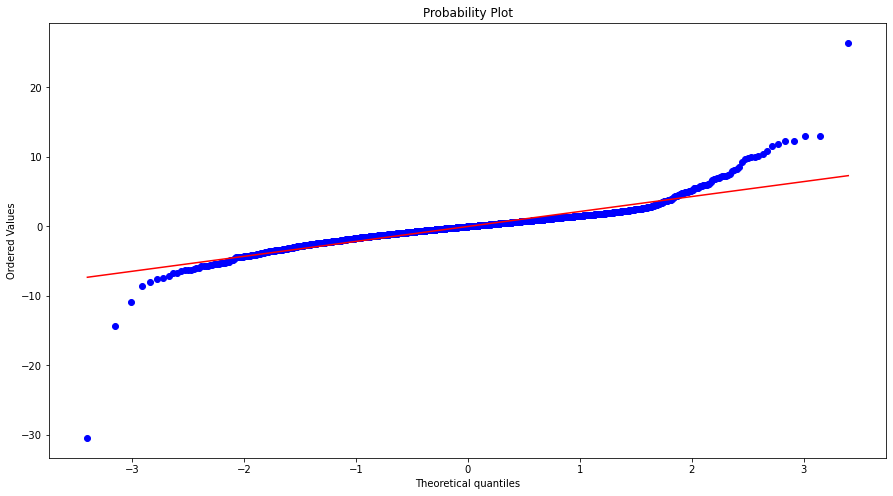

In [137]:
import pylab
import scipy.stats as stats

plt.figure(figsize=(15,8)); # Setting plot size - This size will be assumed for each plot unless otherwise stated
stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

**The residuals appear to be normally distributed based on the QQ plot above**, with little deviation of Theoretical Quantities from the **Best Fit line**, until after 2 Standard Deviations.

In [138]:
stats.shapiro(residual) # Compare against the Shapiro-Wilks test (P-value > 0.05 indicating Normal Distribution)

ShapiroResult(statistic=0.8414922952651978, pvalue=3.302580220720729e-41)

The Shapiro-Wilks test tells a different story, however, and indicates that the **lower p-Value of 0.0 shows the data to not be normally distributed**.  The normality reflected in the QQ plot will serve as confirmation of Normal Distribution in this case.

### Homoscedasticity (Residual Variances Symmetrically  Distributed)

In [139]:
import statsmodels.stats.api as sm2 # Import separate Statsmodels library for running goldfeldquandt for Homoscedasticity
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sm2.het_goldfeldquandt(residual, X_train)
lzip(name, test)

[('F statistic', 0.8679046126149518), ('p-value', 0.9874973145646464)]

A **P-value of over 0.98 (well above 0.05) indicates that the data is Homoscedastic** (the residual variances are symmetrically distributed across the regression line).

### Predicting on the test data

In [140]:
X_test_final = X_test[X_train.columns] # Create the test column based on final X_Train Model selected

In [141]:
X_test_final.head(10) # Examine the top 10 rows of the Predicted/Test Data 

,const,Year,Mileage,Power,Seats,KM/Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Middle,Brand_Premium,Brand_Super_Premium,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third or Higher
4991,1.0,2015,26.59,74.00,5.0,7818.181818,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
5353,1.0,2015,17.21,103.50,5.0,3557.162162,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5982,1.0,2016,17.60,153.86,7.0,2888.888889,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1443,1.0,2016,24.07,67.10,5.0,2857.142857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2172,1.0,2016,16.00,140.00,7.0,5796.675192,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3391,1.0,2013,20.36,78.90,5.0,12676.056338,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4580,1.0,2016,20.14,88.80,5.0,10928.597450,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
888,1.0,2013,21.64,84.80,5.0,11058.823529,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
5967,1.0,2014,16.02,93.70,7.0,7070.707071,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
943,1.0,2016,28.09,88.50,5.0,7466.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [142]:
# Check Model Results on Trained Data (70%)

print("Train Performance\n")
model_performance(olsres0, X_train.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.500163,19.977233,2.346728,0.850698


In [143]:
# Check Model Results on Tested Data (30%)

print("Test Performance\n")
model_performance(olsres0, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.479305,19.273075,2.276999,0.868791


In [144]:
# Print the final model summary selected - after all adjustments made

olsmod0 = sm.OLS(y_train, X_train)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     502.6
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        13:38:27   Log-Likelihood:                -4664.3
No. Observations:                2053   AIC:                             9377.
Df Residuals:                    2029   BIC:                             9512.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Conclusions

- Engine and Power and very highly correlated, to the point that one variable was removed (engine) whilst still ensuring accuracy within the model in regards to Pricing predictions
- By converting kilometers to a ratio of price, we could better understand the proportions and the inverse relationship (negative correlation) between increases in distance driven decreasing overall car value since it's depreciating asset that experiences wear and tear.
- As is somewhat expected, the majority of vehicles sold on the second-hand market are of model years newer than the pre-2000s, and largely newer than 2010 as the data shows
- There is always the possibility of additional noise remaining in the model, leaving the chance of miscalculations in the model as shown by a MAPE score of around 20 (only 80% accuracy in some cases)
- Location can have some affect on a vehicles pricing and it's certainly possible to get a better deal on a very similar vehicle sold in a cheaper city vs. an expensive one
    - Regarding pricing predictions, there are other variables have a greater cumulative effect, such as a car's performance (engine, power, mileage/fuel economy, and how new it is


**Some additional variables that would be helpful in noting for price predictions (sometimes hard to quantify), are:**
- Inspection Details/Damages or Prior Accidents
- Overall Cleanliness
- Maintenance
- Owner's Smoking status
- Recalls (Addressed/Not Addressed)
- Title issues
    - Repossessed
    - Previously salvaged
    - Liens on the vehicle
- Accessories/Modifications in Vehicle
    - Could be Positive or Negative depending on Buyer preferences
 